Stephanie Beaver
MSBA Capstone analysis of 148 of Sportsman's Warehouse locations (146 listed on website plus Gunsmith at Sportsmans and distribution center both in SLC but listed as 2 addresses (one has a suite number))
NLP sentiment analysis, text analysis etc.
Started May 31, 2025 WIP


In [1]:
## When getting started,,, unistall using this cell, then install the correct versions in the next cell, restart the session. Then skip this unistall step and reinstall the correct
## versions again. Then proceed.
!pip uninstall -y numpy pandas scipy pyldavis



Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3


In [214]:
!pip install numpy==1.24.4 pandas==1.5.3 scipy==1.10.1



In [215]:
!pip install pyldavis==3.3.1 --no-deps



In [216]:
import numpy as np
import pandas as pd
import scipy
import pyLDAvis

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("pyLDAvis:", pyLDAvis.__version__)


numpy: 1.24.4
pandas: 1.5.3
scipy: 1.10.1
pyLDAvis: 3.3.1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Capstone/CSVs

/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs


In [6]:
import os
import matplotlib.pyplot as plt
import time

fpath = '/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/'
print(os.listdir(fpath))


['converted_Midvale_reviews.csv', 'converted_Provo_reviews.csv', 'converted_Riverdale_reviews.csv', 'converted_TwinFalls_reviews.csv', 'converted_SouthJordan_reviews.csv', 'converted_StGeorge_reviews.csv', 'IdahoFalls_converted_reviews.csv', 'Flagstaff_converted_reviews.csv', 'CSVsMidvale_cleaned_Text_Analysis.csv', 'NLP', '.ipynb_checkpoints', 'sportsmans_converted.csv', 'sportsmans_converted(1).csv', 'sportsmans_converted(2).csv', 'sportsmans_converted3.csv', 'Sportsmans_Final.csv', 'Sportsmans_Final(1).csv', 'sportsmans_converted(5).csv', 'sportsmans_converted(6).csv', 'sportsmans_converted(7).csv', 'sportsmans_converted(8).csv', 'ALL_Sportsmans_Final.csv', 'All_Sportsmans_Text_Analysis.csv', 'employee_sentiment_summary.csv', 'df_cleaned_with_names.csv', 'employee_name_mentions.csv', 'Employee_Performance_Summary.csv', 'Sportsmans_Reviews_Enriched.csv']


In [7]:
%ls

 ALL_Sportsmans_Final.csv                IdahoFalls_converted_reviews.csv
 All_Sportsmans_Text_Analysis.csv        NLP/
 converted_Midvale_reviews.csv          'sportsmans_converted(1).csv'
 converted_Provo_reviews.csv            'sportsmans_converted(2).csv'
 converted_Riverdale_reviews.csv         sportsmans_converted3.csv
 converted_SouthJordan_reviews.csv      'sportsmans_converted(5).csv'
 converted_StGeorge_reviews.csv         'sportsmans_converted(6).csv'
 converted_TwinFalls_reviews.csv        'sportsmans_converted(7).csv'
 CSVsMidvale_cleaned_Text_Analysis.csv  'sportsmans_converted(8).csv'
 df_cleaned_with_names.csv               sportsmans_converted.csv
 employee_name_mentions.csv             'Sportsmans_Final(1).csv'
 Employee_Performance_Summary.csv        Sportsmans_Final.csv
 employee_sentiment_summary.csv          Sportsmans_Reviews_Enriched.csv
 Flagstaff_converted_reviews.csv


In [453]:
df = pd.read_csv('ALL_Sportsmans_Final.csv', header = 0)
df.head(5)

,Author,Rating,Date,Review Text,Reviewer Experience,Store Address
0,Greg Kooker,5,Jun 2025,NaN,25,"921 SE Oralabor Rd, Ankeny, IA 50021"
1,Misty Maksin,5,Jun 2025,Ex ellent customer service,7,"1901 E Parks Hwy, Wasilla, AK 99654"
2,Mycool Williams,5,Jun 2025,It's an all-around great place to shop for all...,5,"520 Clock Tower Way, Crescent Springs, KY 41017"
3,Sam F,5,Jun 2025,NaN,210,"2231 E Rte 66, Flagstaff, AZ 86004"
4,Cyn Eaton,5,Jun 2025,NaN,4,"2231 E Rte 66, Flagstaff, AZ 86004"


In [454]:
print(df_cleaned['Date'].dtype)


object


In [455]:
df.shape

(129252, 6)

In [456]:
print(df_cleaned['Date'].dtype)


object


In [224]:
df.columns

Index(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address'],
      dtype='object')

In [457]:
df['Review Text'].isna().any()

True

In [458]:
#Convert empty reviews to NaN for consistency
df['Review Text'] = df['Review Text'].replace('',np.nan)

In [459]:
# drop rows where "Review Text" column is Nan (to ensure consistency)
df_cleaned =df.dropna(subset=['Review Text'])
print(df_cleaned)

                     Author  Rating      Date  \
1              Misty Maksin       5  Jun 2025   
2           Mycool Williams       5  Jun 2025   
5       Antonio Cesar Rocha       4  Jun 2025   
6                   Ivy Seo       5  Jun 2025   
8                Wes Altice       4  Jun 2025   
...                     ...     ...       ...   
129245           Debby Long       5  Jun 2024   
129246            john pate       5  Jun 2024   
129247  Karen Cline-Tardiff       5  Jun 2024   
129248                  ron       3  Jun 2024   
129249         Dave Lindhag       4  Jun 2024   

                                              Review Text  \
1                              Ex ellent customer service   
2       It's an all-around great place to shop for all...   
5         The products are very diverse, I liked them 👍 …   
6       Anthony C was very helpful. Outstanding custom...   
8                          Good selection of fishing gear   
...                                          

In [460]:
df_cleaned.shape

(72013, 6)

Of the 129252 reviews for the Sportsmans Warehouse stores, 72013 left review comments.

Textblob and VADER have been pre trained for sentiment analysis on large datasets.  

Text blob pre trained sentiment analysis VAder from nitk been trained on large datasets.
Positive sentiment : 0.05 or greater
Neutral sentiment: -0.05 to 0.05
Negative less than -0.05 or lower


In [450]:
print(df_cleaned['Date'].dtype)


object


In [228]:
from textblob import TextBlob

In [229]:
df_cleaned['Review Text'].iloc[0]

'Ex ellent customer service'

In [230]:
text = "Awesome store!, even though nobody offered to help even when we asked for it."
#Create Text Blob Object covert blob to text
blob = TextBlob(text)
# Get the Polarity
polarity = blob.sentiment.polarity
blob.sentiment  #extracts polarity
subjectivity = blob.sentiment.subjectivity  #extracts sentiment

# Determine Sentiment
sentiment = 'positive' if polarity > 0.05 else 'negative' if polarity < -0.05 else 'neutral'

print(f"Polarity: {polarity}")
print(f"Sentiment: {sentiment}")
print(f"subjectivity:{subjectivity}")

Polarity: 1.0
Sentiment: positive
subjectivity:1.0


Interesting showcase of a mixed review and downside of sentiment analysis. The Comment was overal positive, but did have some feedback for improvement.

Now I will apply to the entire data set using the apply function of Pandas

In [231]:
def analyze_sentiment(text):
    blob = TextBlob(text)

    #Get sentiment polarity
    polarity = blob.sentiment.polarity
    sentiment = 'positive' if polarity > 0.05 else 'negative' if polarity < -0.05 else 'neutral'
    return sentiment

In [232]:
df_cleaned['sentiment'] = df['Review Text'].apply(lambda x: analyze_sentiment(str(x)))

<ipython-input-232-2149503819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df['Review Text'].apply(lambda x: analyze_sentiment(str(x)))


In [233]:
df_cleaned.head(10)

,Author,Rating,Date,Review Text,Reviewer Experience,Store Address,sentiment
1,Misty Maksin,5,Jun 2025,Ex ellent customer service,7,"1901 E Parks Hwy, Wasilla, AK 99654",neutral
2,Mycool Williams,5,Jun 2025,It's an all-around great place to shop for all...,5,"520 Clock Tower Way, Crescent Springs, KY 41017",positive
5,Antonio Cesar Rocha,4,Jun 2025,"The products are very diverse, I liked them 👍 …",338,"4956 Centre Pointe Dr, Charleston, SC 29418",positive
6,Ivy Seo,5,Jun 2025,Anthony C was very helpful. Outstanding custom...,16,"6329 Naples Blvd, Naples, FL 34109",positive
8,Wes Altice,4,Jun 2025,Good selection of fishing gear,8,"3456 Broadway St, Eureka, CA 95503",positive
10,Nelson,5,Jun 2025,Only place I could find that stocks hog casing...,87,"8468 N Friant Rd, Fresno, CA 93720",neutral
11,Felipe Davila Jr,5,Jun 2025,Very friendly.\nThey were.\nExperienced to wha...,2,"8468 N Friant Rd, Fresno, CA 93720",positive
13,Jartrain,3,Jun 2025,I needed some hiking gear for a trip I'm going...,34,"970 W Street Rd Space 1300, Warminster, PA 18974",negative
16,Scott L,1,Jun 2025,what kind of sporting goods store doesnt sell ...,69,"4408 Illinois Rd, Fort Wayne, IN 46804",positive
17,Jeremiah Tellier,5,Jun 2025,Grown fellers Chucky Cheese!!,0,"800 Brevard Rd Ste 901, Asheville, NC 28806",neutral


In [449]:
print(df_cleaned['Date'].dtype)


object


In [238]:
df_cleaned.shape

(72013, 7)

In [236]:
df_cleaned['sentiment'].isna().any()

False

In [237]:
df_cleaned['sentiment'].value_counts()

,sentiment
positive,53048
neutral,12066
negative,6899


In [239]:
df_cleaned['Rating'].value_counts()  # star ratings of the 72K with text reviews

,Rating
5,41239
4,13864
1,8401
3,5423
2,3086


In [240]:
df['Rating'].value_counts() # star ratings from all the original 124K reviews

,Rating
5,75558
4,29726
3,10296
1,9641
2,4031


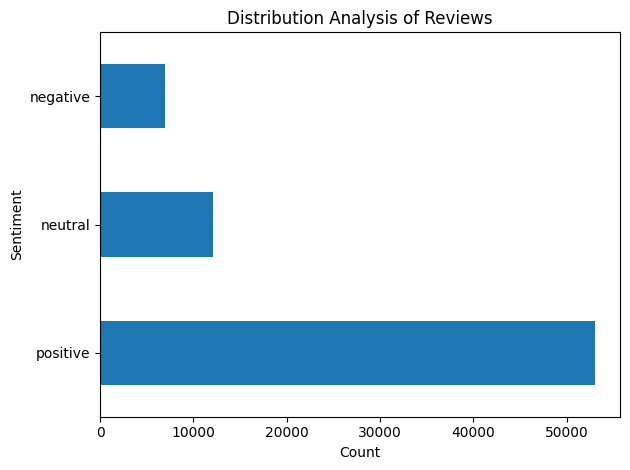

In [241]:
import matplotlib.pyplot as plt
#Count the occurances of each sentiment and create a horizontal
df_cleaned['sentiment'].value_counts().plot(kind='barh')

#Adding labels and title for clarity
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Distribution Analysis of Reviews')

plt.tight_layout()

#Show the plot
plt.show()

In [448]:
print(df_cleaned['Date'].dtype)


object


In [248]:
df['Date'].value_counts()

,Date
2019-06-01,23954
2020-06-01,21423
2021-06-01,17774
2018-06-01,15606
2022-06-01,14597
2023-06-01,11445
2024-06-01,10317
2017-06-01,4626
2025-05-01,1361
2025-01-01,819


df Date column dtype: datetime64[ns], unique dates: 27
df_cleaned Date column dtype: datetime64[ns], unique dates: 17


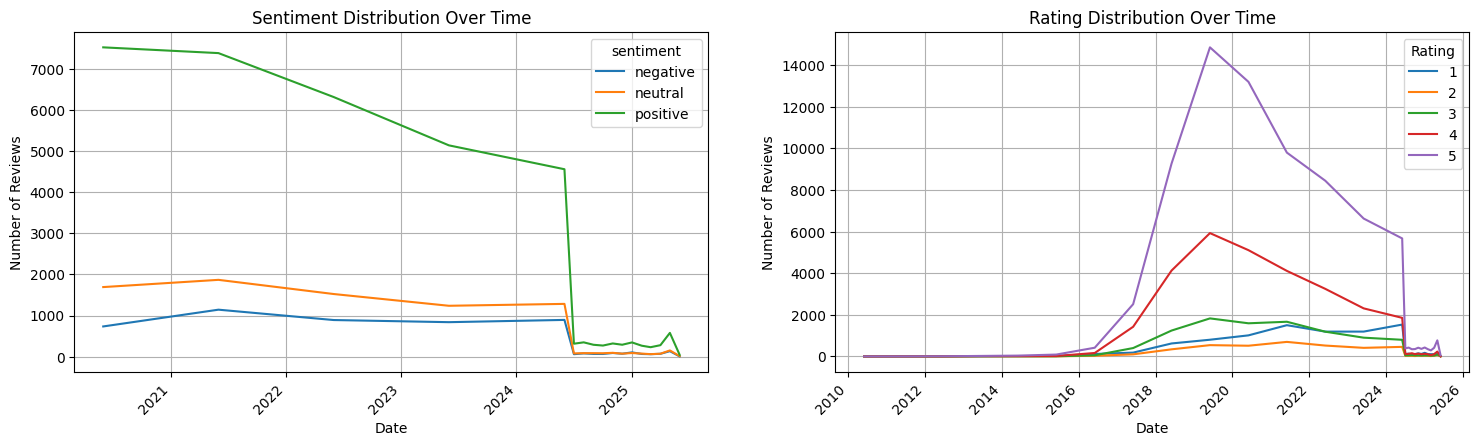

In [253]:
# Ensure 'Date' is datetime64, normalized to first of the month, in both dfs
df['Date'] = pd.to_datetime(df['Date'], errors='raise').dt.to_period('M').dt.to_timestamp()
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='raise').dt.to_period('M').dt.to_timestamp()

# Optional: Confirm unique dates and dtype for sanity check
print(f"df Date column dtype: {df['Date'].dtype}, unique dates: {df['Date'].nunique()}")
print(f"df_cleaned Date column dtype: {df_cleaned['Date'].dtype}, unique dates: {df_cleaned['Date'].nunique()}")

# Then run your plotting code
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

ax1 = plt.subplot(1, 2, 1)
sentiment_over_time = df_cleaned.groupby(['Date', 'sentiment']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='line', ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Reviews')
ax1.set_title('Sentiment Distribution Over Time')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(1, 2, 2)
rating_over_time = df.groupby(['Date', 'Rating']).size().unstack(fill_value=0)
rating_over_time.plot(kind='line', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Reviews')
ax2.set_title('Rating Distribution Over Time')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.show()


 This visual shows that the total number of reviews has declined recently. Additionally, while positive sentiment has decreased, there’s been an uptick in both neutral and negative sentiments. This suggests that customer satisfaction might be shifting, and it could be valuable to investigate the underlying causes to help improve overall experience and engagement.”

In [461]:
print(df_cleaned['Date'].dtype)


object


I'm going to look at years 2020 on

In [463]:
# Make a clean copy of df to work on
df_cleaned = df.copy()

# Ensure 'Date' column is datetime (convert if needed)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='raise')

# Filter: keep only rows with Date >= 2020-01-01
df_cleaned = df_cleaned[df_cleaned['Date'] >= pd.Timestamp('2020-01-01')]

# Normalize dates to first day of the month for consistent monthly grouping
df_cleaned['Date'] = df_cleaned['Date'].dt.to_period('M').dt.to_timestamp()

# Now df_cleaned['Date'] is datetime64[ns] with normalized monthly dates



In [464]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [266]:
df_cleaned['Date'].value_counts()

,Date
2020-06-01,21423
2021-06-01,17774
2022-06-01,14597
2023-06-01,11445
2024-06-01,10317
2025-05-01,1361
2025-01-01,819
2024-11-01,797
2024-08-01,768
2025-04-01,708


In [466]:

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Date'] = df_cleaned['Date'].dt.to_period('M').dt.to_timestamp()


In [468]:
df_cleaned['Date'].value_counts()

,Date
2020-06-01,21423
2021-06-01,17774
2022-06-01,14597
2023-06-01,11445
2024-06-01,10317
2025-05-01,1361
2025-01-01,819
2024-11-01,797
2024-08-01,768
2025-04-01,708


In [469]:
print(df_cleaned['Date'].head())
print(type(df_cleaned['Date'].iloc[0]))
print(df_cleaned['Date'].dtype)


0   2025-06-01
1   2025-06-01
2   2025-06-01
3   2025-06-01
4   2025-06-01
Name: Date, dtype: datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
datetime64[ns]


In [470]:
df_cleaned.shape

(83955, 6)

In [471]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [473]:
df_cleaned.head()

,Author,Rating,Date,Review Text,Reviewer Experience,Store Address
0,Greg Kooker,5,2025-06-01,NaN,25,"921 SE Oralabor Rd, Ankeny, IA 50021"
1,Misty Maksin,5,2025-06-01,Ex ellent customer service,7,"1901 E Parks Hwy, Wasilla, AK 99654"
2,Mycool Williams,5,2025-06-01,It's an all-around great place to shop for all...,5,"520 Clock Tower Way, Crescent Springs, KY 41017"
3,Sam F,5,2025-06-01,NaN,210,"2231 E Rte 66, Flagstaff, AZ 86004"
4,Cyn Eaton,5,2025-06-01,NaN,4,"2231 E Rte 66, Flagstaff, AZ 86004"


In [474]:
import os
import time

In [475]:
df_cleaned.columns

Index(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address'],
      dtype='object')

In [476]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [486]:
df_cleaned['Store Address'].unique().tolist()


['921 SE Oralabor Rd, Ankeny, IA 50021',
 '1901 E Parks Hwy, Wasilla, AK 99654',
 '520 Clock Tower Way, Crescent Springs, KY 41017',
 '2231 E Rte 66, Flagstaff, AZ 86004',
 '4956 Centre Pointe Dr, Charleston, SC 29418',
 '6329 Naples Blvd, Naples, FL 34109',
 '63492 NW Hunnell Rd, Bend, OR 97703',
 '3456 Broadway St, Eureka, CA 95503',
 '190 Delco Plaza, Winchester, VA 22602',
 '8468 N Friant Rd, Fresno, CA 93720',
 '423 Merhar Ave, Fairbanks, AK 99701',
 '970 W Street Rd Space 1300, Warminster, PA 18974',
 '4408 Illinois Rd, Fort Wayne, IN 46804',
 '800 Brevard Rd Ste 901, Asheville, NC 28806',
 '2344 Sunrise Blvd, Rancho Cordova, CA 95670',
 '2002 Thain Grd, Lewiston, ID 83501',
 '1200 Miracle Mile Dr, Rochester, NY 14623',
 '4297 Meridian St, Bellingham, WA 98226',
 '5215 Century Ave, Kalamazoo, MI 49006',
 '3500 Capital City Mall Dr, Camp Hill, PA 17011',
 '1750 S Greenfield Rd, Mesa, AZ 85206',
 '4030 Murdoch Ave, Parkersburg, WV 26105',
 '130 Marathon Way, Southaven, MS 38671',
 

In [487]:
df_cleaned['Store Address'].nunique()

148

In [488]:
df_cleaned.reset_index(drop=True, inplace=True)


In [489]:
df_cleaned.loc[10, 'Review Text']

'Only place I could find that stocks hog casings and was open memorial day saved my bacon....Cheddar pork sausage batch'

In [490]:
# leaving in - in case there's a surprise later
# Clean newlines and extra spaces
df_cleaned['Review Text'] = df_cleaned['Review Text'].str.replace('\n', ' ', regex=False)
df_cleaned['Review Text'] = df_cleaned['Review Text'].str.replace('\r', ' ', regex=False)
df_cleaned['Review Text'] = df_cleaned['Review Text'].str.replace('  ', ' ', regex=False)

# we're using the .str method in pandas toapply a string method
# to an entire column
# we do it twice to first replace \n's and then to replace \r's
# then replace double spaces with single spaces

In [491]:
import nltk
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Drop rows where 'Review Text' is null or NaN
df_cleaned = df_cleaned[df_cleaned['Review Text'].notnull()]

# Calculate number of stopwords in each review (only if it's a string)
df_cleaned['nstopwords'] = df_cleaned['Review Text'].apply(
    lambda x: len([w for w in x.split() if w in sw]) if isinstance(x, str) else 0
)

# Calculate total length of each review text
df_cleaned['textlen'] = df_cleaned['Review Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Calculate percentage of stopwords
df_cleaned['pct_stopwords'] = df_cleaned['nstopwords'] / df_cleaned['textlen'].replace(0, 1)  # avoid div by zero


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-491-1790336889>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['nstopwords'] = df_cleaned['Review Text'].apply(
<ipython-input-491-1790336889>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['textlen'] = df_cleaned['Review Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
<ipython-input-491-1790336889>:20: SettingWithCopyWarning: 


In [492]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [493]:
df_cleaned.head(10)

,Author,Rating,Date,Review Text,Reviewer Experience,Store Address,nstopwords,textlen,pct_stopwords
1,Misty Maksin,5,2025-06-01,Ex ellent customer service,7,"1901 E Parks Hwy, Wasilla, AK 99654",0,4,0.000000
2,Mycool Williams,5,2025-06-01,It's an all-around great place to shop for all...,5,"520 Clock Tower Way, Crescent Springs, KY 41017",22,60,0.366667
5,Antonio Cesar Rocha,4,2025-06-01,"The products are very diverse, I liked them 👍 …",338,"4956 Centre Pointe Dr, Charleston, SC 29418",3,10,0.300000
6,Ivy Seo,5,2025-06-01,Anthony C was very helpful. Outstanding custom...,16,"6329 Naples Blvd, Naples, FL 34109",2,8,0.250000
8,Wes Altice,4,2025-06-01,Good selection of fishing gear,8,"3456 Broadway St, Eureka, CA 95503",1,5,0.200000
10,Nelson,5,2025-06-01,Only place I could find that stocks hog casing...,87,"8468 N Friant Rd, Fresno, CA 93720",4,20,0.200000
11,Felipe Davila Jr,5,2025-06-01,Very friendly. They were. Experienced to what ...,2,"8468 N Friant Rd, Fresno, CA 93720",3,10,0.300000
13,Jartrain,3,2025-06-01,I needed some hiking gear for a trip I'm going...,34,"970 W Street Rd Space 1300, Warminster, PA 18974",25,60,0.416667
16,Scott L,1,2025-06-01,what kind of sporting goods store doesnt sell ...,69,"4408 Illinois Rd, Fort Wayne, IN 46804",12,34,0.352941
17,Jeremiah Tellier,5,2025-06-01,Grown fellers Chucky Cheese!!,0,"800 Brevard Rd Ste 901, Asheville, NC 28806",0,4,0.000000


In [494]:
sorted(sw)[:10]


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

<ipython-input-495-959238265>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['nstopwords'] = df_cleaned['Review Text'].str.lower().apply(
<ipython-input-495-959238265>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['textlen'] = df_cleaned['Review Text'].str.split().map(len)
<ipython-input-495-959238265>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<Axes: >

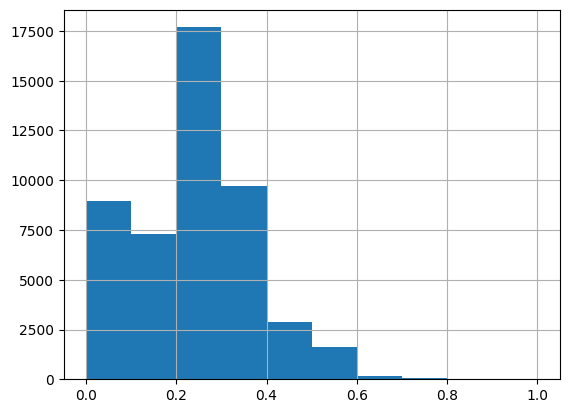

In [495]:
# 'sw' is the stopword list, filtered for words >= 3 letters long
sw = [w for w in sw if len(w) >= 3]

# Count how many stopwords in each review (case insensitive)
df_cleaned['nstopwords'] = df_cleaned['Review Text'].str.lower().apply(
    lambda x: len([w for w in x.split() if w in sw])
)

# Count total number of words in each review
df_cleaned['textlen'] = df_cleaned['Review Text'].str.split().map(len)

# Calculate percentage of stopwords per review
df_cleaned['pct_stopwords'] = df_cleaned['nstopwords'] / df_cleaned['textlen']

# Look at the distribution of pct_stopwords
df_cleaned['pct_stopwords'].hist()


# info could be usefull for finding sentiment based on review length

This shows a low amount of stop words. Short and to the point with higher information density.  

In [496]:
# Show 10 random reviews where less than 5% of the words are stopwords
df_cleaned.loc[df_cleaned.pct_stopwords < 0.05, 'Review Text'].sample(10)


,Review Text
1623,Cool place to go
67382,Great as always!!!!
42647,Great
12450,Great fishing/hunting products
74157,Great customer service
16427,Nice selection of a wide variety of outdoor gear.
11185,Definitely going back!
29089,A lot of holiday gift ideas here.
74190,Cheap prices on hard to find items
19878,"Knowledgeable courteous staff, large selection..."


We will apply the pre-trained polarity and subjectivity metrics.

In [497]:
# calculate polarity and subjectivity in one shot
df_cleaned['polarity'] = df_cleaned['Review Text'].apply(
    lambda x: TextBlob(x).sentiment.polarity)

# calculate polarity and subjectivity in one shot
df_cleaned['subjectivity'] = df_cleaned['Review Text'].apply(
    lambda x: TextBlob(x).sentiment.subjectivity)

<ipython-input-497-1029483272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['polarity'] = df_cleaned['Review Text'].apply(
<ipython-input-497-1029483272>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['subjectivity'] = df_cleaned['Review Text'].apply(


In [499]:
df_cleaned[['Review Text', 'polarity', 'subjectivity']].head(10)


,Review Text,polarity,subjectivity
1,Ex ellent customer service,0.000000,0.000000
2,It's an all-around great place to shop for all...,0.281000,0.479714
5,"The products are very diverse, I liked them 👍 …",0.400000,0.550000
6,Anthony C was very helpful. Outstanding custom...,0.412500,0.587500
8,Good selection of fishing gear,0.700000,0.600000
10,Only place I could find that stocks hog casing...,0.000000,0.750000
11,Very friendly. They were. Experienced to what ...,0.643750,0.775000
13,I needed some hiking gear for a trip I'm going...,-0.083333,0.083333
16,what kind of sporting goods store doesnt sell ...,0.233333,0.933333
17,Grown fellers Chucky Cheese!!,0.000000,0.000000


In [500]:
fpath = '/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/'

if 1==1: # save if 1==1
    df_cleaned.to_csv(fpath+'All_Sportsmans_Text_Analysis.csv',index=False)

if 1==0: # read from disk if 1==1
    df_cleaned = pd.read_csv(fpath+'All_Sportsmans_Text_Analysis.csv', index_col = 0)

In [501]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [502]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/All_Sportsmans_Text_Analysis.csv')
df3.head()

,Author,Rating,Date,Review Text,Reviewer Experience,Store Address,nstopwords,textlen,pct_stopwords,polarity,subjectivity
0,Misty Maksin,5,2025-06-01,Ex ellent customer service,7,"1901 E Parks Hwy, Wasilla, AK 99654",0,4,0.000000,0.0000,0.000000
1,Mycool Williams,5,2025-06-01,It's an all-around great place to shop for all...,5,"520 Clock Tower Way, Crescent Springs, KY 41017",19,60,0.316667,0.2810,0.479714
2,Antonio Cesar Rocha,4,2025-06-01,"The products are very diverse, I liked them 👍 …",338,"4956 Centre Pointe Dr, Charleston, SC 29418",4,10,0.400000,0.4000,0.550000
3,Ivy Seo,5,2025-06-01,Anthony C was very helpful. Outstanding custom...,16,"6329 Naples Blvd, Naples, FL 34109",2,8,0.250000,0.4125,0.587500
4,Wes Altice,4,2025-06-01,Good selection of fishing gear,8,"3456 Broadway St, Eureka, CA 95503",0,5,0.000000,0.7000,0.600000


Text(0.5, 1.0, 'Distribution of Polarity')

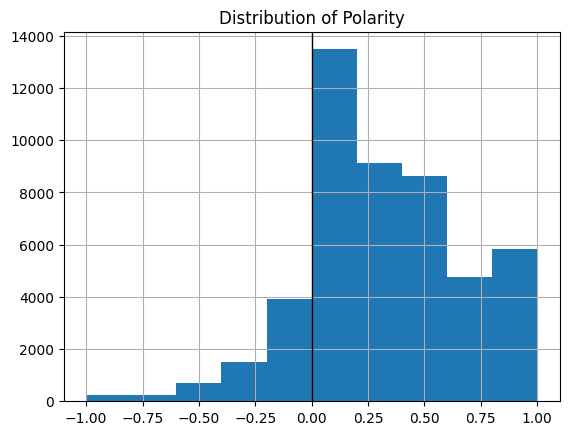

In [503]:
df_cleaned.polarity.hist()
plt.axvline(x= 0, color = 'black', linewidth = 1)
plt.title('Distribution of Polarity')

Overall reviews of Sportsman's Warehouse, on average, have a positive polarity meaning there are more positive reviews than negative- which we saw above.

Text(0.5, 1.0, 'Distribution of Subjectivity')

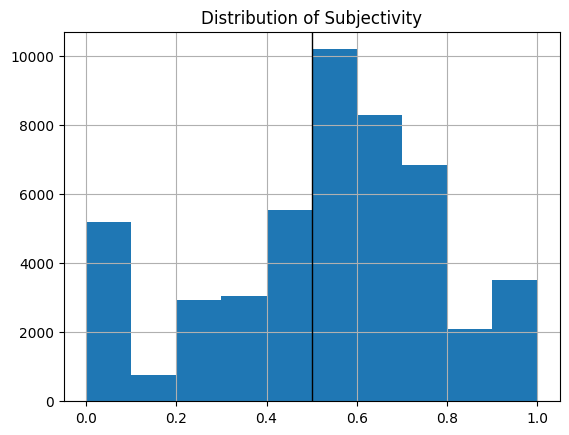

In [504]:
df_cleaned.subjectivity.hist()
plt.axvline(x= 0.5, color = 'black', linewidth = 1)
plt.title('Distribution of Subjectivity')

subjectivity has a bimodal distribution. This could implicates a presence of polarizing reviews. We will seperate information down to find the two groups.

IS the sentiment captured in the text is related with the star ratings?

In [505]:
df_cleaned[['Rating', 'Review Text', 'polarity', 'subjectivity']].corr()

<ipython-input-505-1932234928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned[['Rating', 'Review Text', 'polarity', 'subjectivity']].corr()


,Rating,polarity,subjectivity
Rating,1.000000,0.550451,0.166915
polarity,0.550451,1.000000,0.471907
subjectivity,0.166915,0.471907,1.000000


In [506]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


The values range from -1 to 1:

+1 = perfect positive correlation (they go up together)

0 = no correlation

-1 = perfect negative correlation (one goes up, the other down)



Two people who both rated a store 4 stars might have very different feelings towards the restaurant. While one may think 4 stars is a high rating, another might view 4 stars as just average. The text that they write may be capturing their true sentiment while the star rating they give might be capturing their relative sentiment. -

 Rating and Polarity= ~0.55 is moderate (happy reviews tend to leave happy ratings
 Polarity and Subjectivity=  0.47 emotional reviews tend to be more polarized. Rating and subjectivity = very weak positive correlation the number of stars doesn't predict how subjective the review is.

To test whether this second explanation holds some water, we can perform an additional analysis. Let's de-mean everyone's ratings, i.e. subtract each user's average rating from their actual rating, to get a measure of the relative sentiment. This way, we can get rid of user-level biases in general sentiment (subtract away individuals' tendencies to give higher or lower ratings). If the correlation between polarity and this new measure is higher, then we can be sure that at least some of the differences between polarity and star rating is partially explained by individual differences in the perception of the "star rating" scale.


In [507]:
df_cleaned['User Avg Rating'] = df_cleaned.Rating - df_cleaned.groupby('Author')['Rating'].transform(np.nanmean) # create the user-demeaned star rating
# 1. Note that .transform(np.nanmean) will create a column that is equal to
#    the average star rating given by the user for every row corresponding to each user.
# For example, a user with star ratings 3,4,5 will yield the values 4,4,4 in the same row
# 2. Subtracting the user-mean-transformed ratings from actual star ratings will get us the demeaned ratings.
# In the above example, we will have 3,4,5-4,4,4 = -1,0,1

<ipython-input-507-4049349733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['User Avg Rating'] = df_cleaned.Rating - df_cleaned.groupby('Author')['Rating'].transform(np.nanmean) # create the user-demeaned star rating


In [508]:
df_cleaned[['Rating', 'User Avg Rating', 'polarity', 'subjectivity']].corr()

,Rating,User Avg Rating,polarity,subjectivity
Rating,1.000000,0.244807,0.550451,0.166915
User Avg Rating,0.244807,1.000000,0.130253,0.044885
polarity,0.550451,0.130253,1.000000,0.471907
subjectivity,0.166915,0.044885,0.471907,1.000000


Polarity remains the most valuable predictor of Rating.

User Avg Rating is not a strong influencer of any one review’s rating, polarity, or subjectivity.

This tells you users are inconsistent in tone/ratings from review to review — possibly depending on the store, mood, etc.

Polarity and Subjectivity are still closely linked, suggesting that people get emotional when they’re passionate (positive or negative).

Topics reviewers wanted to talk about.

In [509]:
from collections import Counter

In [510]:
import spacy
nlp = spacy.load('en_core_web_sm') # load the English language model

In [511]:
text = 'I am working on my Capstone project learning NLP.'
parsed = nlp(text) # use NLP to parse the text

In [512]:
# The parsed object has the property "sents"
# which generates a parsed form of each sentence in a text.
# Looping through sents, we can create a list of sentences.
# In this example, we have just one sentence.
[s for s in parsed.sents]

[I am working on my Capstone project learning NLP.]

In [513]:
# each sentence s consists of another iteratble of words
[[w for w in s] for s in parsed.sents]
# see here that the "." is separated from "work"
# this doesn't happen if you just use text.split()

[[I, am, working, on, my, Capstone, project, learning, NLP, .]]

In [514]:
# each sentence s consists of another iteratble of words
[[w for w in s] for s in parsed.sents]

[[I, am, working, on, my, Capstone, project, learning, NLP, .]]

In [515]:
# to get lemmatization:
[[w.lemma_ for w in s] for s in parsed.sents]

[['I', 'be', 'work', 'on', 'my', 'Capstone', 'project', 'learn', 'NLP', '.']]

In [516]:
sw = stopwords.words('english')
[Counter([w.lemma_ for w in s if (w.lemma_.lower() not in ['-PRON-']+sw)&(~w.is_punct)]) for s in parsed.sents]
# (w.lemma_ not in ['-PRON-']+sw) checks to make sure lemmatized word is not in stop words and not a pronoun
# w.is_punct returns True if w is a punctuation, ~ w.is_punct is the opposite

[Counter({'work': 1, 'Capstone': 1, 'project': 1, 'learn': 1, 'NLP': 1})]

In [517]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [518]:
# let's package the parsing into some functions
def parse(text, nlp, sw, exclusions = []):
    parsed = nlp(text)
    return [[w.lemma_ for w in s if (w.lemma_.lower() not in sw+exclusions)&(~w.is_punct)] for s in parsed.sents]

In [519]:
# let's parse all of the reviews
# this will take a really long time...
# Let's parse the first 100 reviews
texts = list(df_cleaned['Review Text'])[:100]
parsed = [parse(text, nlp, sw, exclusions=['-PRON-']) for text in texts]


In [521]:
fpath = '/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/'  # writing the texts to the drive

nlppath = os.path.join(fpath, 'NLP/')
if not os.path.exists(nlppath):
    os.mkdir(nlppath)


In [522]:
#cleans each review by removing line breaks and writes all reviews into a single .txt file, separated by newlines
texts = '\n'.join(
    df_cleaned['Review Text'].apply(lambda x: x.replace('\n', ' ').replace('\r', ' ') if isinstance(x, str) else '')
)

with open(nlppath + 'All_Sportsmans_Final_Text.txt', 'w', encoding = 'utf-8') as f:
    f.write(texts)

In [523]:
os.listdir(nlppath) # all reviews texts are now written to the disk

['PARSED',
 '.ipynb_checkpoints',
 'viz_20.html',
 'All_Sportsmans_Final_Text.txt',
 'master_parsedtexts.txt',
 'phrase_model_1.phrasemodel',
 'sent_gram_1.txt',
 'phrase_model_2.phrasemodel',
 'sent_gram_2.txt',
 'lda5.lda.state',
 'lda5.lda',
 'lda5.lda.expElogbeta.npy',
 'lda5.lda.id2word',
 'lda10.lda.state',
 'lda10.lda.expElogbeta.npy',
 'lda10.lda.id2word',
 'lda10.lda',
 'lda15.lda.state',
 'lda15.lda.id2word',
 'lda15.lda',
 'lda15.lda.expElogbeta.npy',
 'lda20.lda.state',
 'lda20.lda.id2word',
 'lda20.lda',
 'lda20.lda.expElogbeta.npy',
 'lda25.lda.state',
 'lda25.lda',
 'lda25.lda.expElogbeta.npy',
 'lda25.lda.id2word',
 'lda30.lda.state',
 'lda30.lda',
 'lda30.lda.expElogbeta.npy',
 'lda30.lda.id2word',
 'lda35.lda.state',
 'lda35.lda.id2word',
 'lda35.lda.expElogbeta.npy',
 'lda35.lda',
 'lda40.lda.id2word',
 'lda40.lda.state',
 'lda40.lda.expElogbeta.npy',
 'lda40.lda',
 'lda45.lda.id2word',
 'lda45.lda.expElogbeta.npy',
 'lda45.lda.state',
 'lda45.lda',
 'lda50.lda.state

In [524]:
# next, we need to define a set of functions that reads in this file one line at a time and process it

# function that creates a generator
def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks if there are any

In [525]:
lines = line_doc(nlppath + 'All_Sportsmans_Final_Text.txt')
type(lines) # this is a generator object, which you can use to "generate" one line at a time

generator

In [526]:
next(lines)

'Ex ellent customer service\n'

In [527]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [528]:
# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_.lower() not in exclude)&(~w.is_punct)]


# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time
def lemmatize_sentence_corpus(filename,nlp, batch_size, n_process, sw=[], exclusions=[], encode = 'utf-8'):
    # disable=["ner"] # disable ner makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_process it the number of parallel (simultaneous processes to run)
    # n_process is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_process=n_process, disable=["ner"]):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_process, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile, nlp, batch_size, n_process, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


In [529]:
# writes parsed texts to disk
# this step will take a while (like 15 minutes)
sw = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

import time
t0 = time.time()
write_parsed_sentence_corpus(nlppath+'All_Sportsmans_Final_Text.txt', nlppath+'master_parsedtexts.txt', nlp, batch_size=1000, n_process=2, sw=sw, exclusions = ['-PRON-'])
td = time.time()-t0
print('Took {:.2f} minutes'.format(td/60))

Success
Took 4.71 minutes


In [530]:
# take a look at what we've done
lines = line_doc(nlppath + 'master_parsedtexts.txt')

In [531]:
next(lines).strip() # try to loop through a few sentences

'ex ellent customer service'

We have so far lemmatized the texts and removed stopwords, but more can be done. We can also combine frequently co-appearing words together into phrases  N-gram


In [532]:
!pip install gensim

In [533]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

In [535]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [536]:
def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        parsedfile = textpath
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram

In [537]:
# run phrase detection and return phrasemodels
# this may take a while
import time
t0 = time.time()
ngrams = phrase_detection(nlppath + 'All_Sportsmans_Final_Text.txt', nlppath)
td = time.time()-t0
print('Took {:.2f} minutes'.format(td/60))


Took 0.21 minutes


In [538]:
lines = line_doc(nlppath + 'sent_gram_2.txt')
print(next(lines).strip())

Ex ellent customer_service


In [539]:
next(lines).strip() # try a few until you get phrases with "_"

"It's an all-around great place to shop for_all_your outdoor_needs. Quality gear, equipment, and apparel. Top selection_of_products ranging_from simple hiking, boating, and camping. all the way up to big_game hunting and trapping, and professional fishing. Very respectable and knowledgeable_staff that will happily answer_any and all questions_you_may have. Highly_recommend 👌"

In [540]:
next(lines).strip() # try a few until you get phrases with "_"

'The products are very diverse, I liked them 👍_…'

parse them, apply the phrase models, and save the result as one line = one review (rather than one line = one sentence as we have been doing so far).

In [541]:
def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_process = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        # disable=["ner"] # disable ner makes it a little faster
        exclude = set(sw + exclusions)

        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_process=n_process, disable=["ner"]):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file


In [542]:
# this step takes some time (~15 minutes)
## This one is phrase prediction
t0 = time.time()
nlp = spacy.load('en_core_web_sm')
parsed_folder = nlppath + 'PARSED/'

phrase_prediction(nlppath + 'All_Sportsmans_Final_Text.txt', parsed_folder + 'master_parsedtexts.txt', nlp, ngrams, sw, exclusions=['-PRON-'], batch_size=500, n_process=2)

td = time.time() - t0
print('Took {:.2f} minutes'.format(td / 60))


Took 4.86 minutes


In [543]:
# ✅ Load phrase-modeled parsed file into the DataFrame
with open(parsed_folder + 'master_parsedtexts.txt', 'r', encoding='utf-8') as f:
    parsed_lines = [line.strip() for line in f]

# Make sure the lengths match
assert len(parsed_lines) == len(df_cleaned), "Line count doesn't match DataFrame rows!"

# Assign final parsed/phrase-modeled reviews to DataFrame
df_cleaned['parsed'] = parsed_lines


<ipython-input-543-2988676789>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['parsed'] = parsed_lines


In [544]:
print(type(df_cleaned["Review Text"].iloc[0]))
print(df_cleaned["Review Text"].iloc[0])


<class 'str'>
Ex ellent customer service


In [545]:
# let's take a look at what we did
lines = line_doc(parsed_folder + 'master_parsedtexts.txt')

In [546]:
next(lines).strip() # try a few until you get phrases with "_"  #Customer_service"

'ex ellent customer_service'

In [547]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [548]:
next(lines).strip() # try a few until you get phrases with "_"

'around great place shop outdoor need quality gear equipment apparel top selection product range simple hiking boat camping way big_game hunting trapping professional fishing respectable knowledgeable_staff happily answer question may highly_recommend 👌'

In [549]:
next(lines).strip() # try a few until you get phrases with "_"  "bit_high_"

'product diverse like 👍'

In [550]:
# read in reviews file as list of reviews
with open(parsed_folder + 'master_parsedtexts.txt', 'r', encoding = 'utf-8') as f:
    reviews = f.readlines()

In [551]:
df_cleaned['parsed'] = [review.strip().split() for review in reviews]


<ipython-input-551-4240189720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['parsed'] = [review.strip().split() for review in reviews]


In [552]:
next(lines).strip() # try a few until you get phrases with "_"  "bit_high_"

'anthony c helpful outstanding_customer_service'

In [553]:
# read in reviews file as list of reviews
with open(parsed_folder + 'master_parsedtexts.txt', 'r', encoding = 'utf-8') as f:
    reviews = f.readlines()

In [555]:
df_cleaned['parsed'] = reviews
df_cleaned['parsed'].str.strip() # get rid of any trailing spaces



<ipython-input-555-3990727746>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['parsed'] = reviews


,parsed
1,ex ellent customer_service
2,around great place shop outdoor need quality g...
5,product diverse like 👍
6,anthony c helpful outstanding_customer_service
8,good_selection fishing_gear
...,...
83948,nice store good price super_helpful employee b...
83949,good_prices big selection
83950,nice layout good_selection clutter bunch junk ...
83951,know location relatively new overly impressed ...


In [556]:
print(df_cleaned['Date'].dtype)

datetime64[ns]


In [557]:
if 1==1: # save if 1==1
    df_cleaned.to_csv(parsed_folder + 'allsportsmansparsedphrasemodels.csv',index=False)

if 1==0: # read from disk if 1==1
    df_cleaned= pd.read_csv(parsed_folder + 'allsportsmansparsedphrasemodels.csv')

In [558]:
df_cleaned.columns.values

array(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address', 'nstopwords', 'textlen', 'pct_stopwords',
       'polarity', 'subjectivity', 'User Avg Rating', 'parsed'],
      dtype=object)

In [559]:
# let's get get bag of words by each store
df_rest = df_cleaned.groupby('Store Address')['parsed'].apply(lambda x: Counter(' '.join(list(x)).split())).reset_index()

# For every "city", we're applying the following function on the column "parsed"
# lambda x: Counter(' '.join(list(x)).split())
# Counter counts the number of times each element in an iterable appears
# list(x) turns all the rows of "parsed" into a list for eacy business id
# ' '.join(...) joins all the strings within a list into a single big string
# remember, what's going into join(...) is a list of reviews
# once combined, it's like we have one big review for each business
# we can then use .split() to split the big review into a list of words
# coming full circle, Counter(...) on this list of words counts how many times
# each word is used.

# this creates a dataframe of 3 columns: business_id x word x count
# rename the columns
df_rest.columns = ['Store Address', 'word', 'ct']

In [ ]:
##Since I don't know the Unique Identifiers that Sportsmans Uses, I'm using "Store Address" since that is unique to individual stores

In [560]:
df_rest.sort_values(by = ['Store Address','ct'], ascending = False, inplace = True)

In [561]:
df_rest.head()

,Store Address,word,ct
2812121,"99 E 1400 N, Logan, UT 84341",store,57.0
2812138,"99 E 1400 N, Logan, UT 84341",great,42.0
2812115,"99 E 1400 N, Logan, UT 84341",need,39.0
2812110,"99 E 1400 N, Logan, UT 84341",good,38.0
2812155,"99 E 1400 N, Logan, UT 84341",get,32.0


In [562]:
df_rest_summary = df_rest.groupby('Store Address').first().reset_index()

In [563]:
df_rest_summary

,Store Address,word,ct
0,"10145 W McDowell Rd, Avondale, AZ 85392",store,167.0
1,"1020 N Stratford Rd Ste D, Moses Lake, WA 98837",store,50.0
2,"1038 S Castle Dome Ave, Yuma, AZ 85365",store,113.0
3,"10462 S River Heights Dr, South Jordan, UT 84095",store,128.0
4,"10536 Trinity Pkwy, Stockton, CA 95219",store,104.0
...,...,...,...
143,"925 32nd Ave W, Williston, ND 58801",store,56.0
144,"9401 SE 82nd Ave, Portland, OR 97086",store,197.0
145,"9577 Ridgetop Blvd NW Suite 150, Silverdale, W...",store,156.0
146,"970 W Street Rd Space 1300, Warminster, PA 18974",store,111.0


In [564]:
from gensim import corpora # import the corpora module

In [565]:
# Convert all reviews to a list
reviews = list(df_cleaned.parsed)

In [566]:
#Split each review into a list of words
reviews_list = [r.strip().split() for r in reviews]  # reviews is already a list of tokenized reviews



In [567]:
print(reviews_list[:3])

[['ex', 'ellent', 'customer_service'], ['around', 'great', 'place', 'shop', 'outdoor', 'need', 'quality', 'gear', 'equipment', 'apparel', 'top', 'selection', 'product', 'range', 'simple', 'hiking', 'boat', 'camping', 'way', 'big_game', 'hunting', 'trapping', 'professional', 'fishing', 'respectable', 'knowledgeable_staff', 'happily', 'answer', 'question', 'may', 'highly_recommend', '👌'], ['product', 'diverse', 'like', '👍']]


In [568]:
from gensim.corpora import Dictionary

In [569]:
dictionary = corpora.Dictionary(reviews_list)
print(dictionary.token2id)

{'customer_service': 0, 'ellent': 1, 'ex': 2, 'answer': 3, 'apparel': 4, 'around': 5, 'big_game': 6, 'boat': 7, 'camping': 8, 'equipment': 9, 'fishing': 10, 'gear': 11, 'great': 12, 'happily': 13, 'highly_recommend': 14, 'hiking': 15, 'hunting': 16, 'knowledgeable_staff': 17, 'may': 18, 'need': 19, 'outdoor': 20, 'place': 21, 'product': 22, 'professional': 23, 'quality': 24, 'question': 25, 'range': 26, 'respectable': 27, 'selection': 28, 'shop': 29, 'simple': 30, 'top': 31, 'trapping': 32, 'way': 33, '👌': 34, 'diverse': 35, 'like': 36, '👍': 37, 'anthony': 38, 'c': 39, 'helpful': 40, 'outstanding_customer_service': 41, 'fishing_gear': 42, 'good_selection': 43, 'bacon': 44, 'batch': 45, 'casing': 46, 'cheddar': 47, 'could': 48, 'day': 49, 'find': 50, 'hog': 51, 'memorial': 52, 'open': 53, 'pork': 54, 'sausage': 55, 'save': 56, 'stock': 57, 'experienced': 58, 'friendly': 59, 'sell': 60, 'business': 61, 'buy': 62, 'calculate': 63, 'decide': 64, 'everything': 65, 'get': 66, 'go': 67, 'half

In [570]:
for i, r in enumerate(reviews_list[:5]):
    print(f"Review {i+1}:", r)


Review 1: ['ex', 'ellent', 'customer_service']
Review 2: ['around', 'great', 'place', 'shop', 'outdoor', 'need', 'quality', 'gear', 'equipment', 'apparel', 'top', 'selection', 'product', 'range', 'simple', 'hiking', 'boat', 'camping', 'way', 'big_game', 'hunting', 'trapping', 'professional', 'fishing', 'respectable', 'knowledgeable_staff', 'happily', 'answer', 'question', 'may', 'highly_recommend', '👌']
Review 3: ['product', 'diverse', 'like', '👍']
Review 4: ['anthony', 'c', 'helpful', 'outstanding_customer_service']
Review 5: ['good_selection', 'fishing_gear']


In [571]:
# convert reviews to bag of words corpus
corpus = [dictionary.doc2bow(r) for r in reviews_list]

In [572]:
# ok, now let's do this on the entire corpus of reviews

# simple way to convert a pandas column of strings into a list of list of words:
reviews_list = list(df_cleaned.parsed.str.strip().str.split())
# compute dictionary
dictionary = corpora.Dictionary(reviews_list)

# look at number of words in vocabulary
print(len(dictionary))


19130


In [573]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


# no_below specifies the overall count cutoff below which words are not kept
# For example, no_below = 2 means words that appear less than twice are thrown away
# It is impossible to assign meaning to words that appear only once since there isn't enough
# data to learn from. Moreover, in a large corpus, we would only expect misspellings to appear once

# no_above specifices a *proportional* cutoff, above which, the word is not kept.
# For example, if no_above = .5, then any word that appears in more than half of all documents
# will be thrown out.
# This is the idea that "food" and "good" are not meaningful for topic analysis
# since they appear too frequently.

In [575]:
# let's filter out some extreme words from our dictionary

# no_below specifies the overall count cutoff below which words are not kept
# For example, no_below = 50 means words that appear just once are thrown away
# It is impossible to assign meaning to words that appear only once since there isn't enough
# data to learn from. Moreover, in a large corpus, we would only expect misspellings to appear once

# no_above specifices a *proportional* cutoff, above which, the word is not kept.
# For example, if no_above = .5, then any word that appears in more than half of all documents
# will be thrown out.
# This is the idea that "food" and "good" are not meaningful for topic analysis
# since they appear too frequently.

# The choice of these below/above cutoffs is an art. It requires inspection and intuitive judgment.
# That is, if you want to know if you've chosen good cutoffs, take a look at which words remain after filtering.

# let's try filtering out any word that appears fewer than 25 times
# and filter out any words that appear in more than 25% of all reviews

dictionary.filter_extremes(no_below=100, no_above=0.40)

# look at number of words in our vocabuary after filtering
print(len(dictionary.token2id))

883


In [576]:
# create BOW corpus based on filtered dictionary
corpus = [dictionary.doc2bow(r) for r in reviews_list]

Using the bag of words corpus= let's compute the tf-idf representaiton   or Term Frequency – Inverse Document Frequency. The tfidf number shows how "important" the word is to that particular review, compared to all others.

Higher = more unique and meaningful to that review.

Lower = probably a common word, not very distinctive.

Think of it like a highlight system:

0.25 = “Whoa, that word is telling us something special about this review!”

0.002 = “Meh, that word shows up everywhere.”

In [577]:
from gensim.models import tfidfmodel

tfidf = tfidfmodel.TfidfModel(corpus) # compute the tfidf model

In [578]:
# look at a random store
r = df_cleaned.sample(1)
idx = r.index[0]
rname = list(r['Store Address'])[0]
review = list(r.parsed)[0]
rid = list(r.Author)[0]
star = list(r.Rating)[0]

print(rname +' {}-star Review: '.format(star) + rid) # print out resstaurant name + review star rating + review id

# get document
# here, the review has not been split into tokens yet, remember to do that
doc = dictionary.doc2bow(review.split())

# Create dataframe of word and tfidf
sample = pd.DataFrame([[dictionary[id], np.round(freq,4)] for id, freq in tfidf[doc]], columns = ['word', 'tfidf'])
sample.sort_values(by = 'tfidf', ascending = False, inplace = True)
sample.head(15) # look at top 15 words for a sample review

1750 S Greenfield Rd, Mesa, AZ 85206 5-star Review: Ryan Steele


,word,tfidf
2,friendly_staff,0.7995
1,price,0.4739
0,great,0.3691


In [579]:
print(df_rest.columns)


Index(['Store Address', 'word', 'ct'], dtype='object')


In [580]:
df_rest = df_cleaned.groupby(['Store Address'])['parsed'].apply(lambda x: ' '.join(list(x)).split()).reset_index()
df_rest.columns = ['Store Address','parsed']
df_rest.head(20)

,Store Address,parsed
0,"10145 W McDowell Rd, Avondale, AZ 85392","[good, customer_service, good, price, wide_sel..."
1,"1020 N Stratford Rd Ste D, Moses Lake, WA 98837","[one_stop_shop, anything, hunt, relate, well, ..."
2,"1038 S Castle Dome Ave, Yuma, AZ 85365","[sportsman, 's, pro, gun, would, like, give, p..."
3,"10462 S River Heights Dr, South Jordan, UT 84095","[covid, summertime, open_till, 9, look, fishin..."
4,"10536 Trinity Pkwy, Stockton, CA 95219","[hardly, shop, always, good, experience, come,..."
5,"1060 Harter Pkwy, Yuba City, CA 95993","[love, sportsman, 's, usually, purchase, firea..."
6,"10645 Northeast Tanasbourne Dr, Hillsboro, OR ...","[sportsman, ’s, warehouse, great, place, outdo..."
7,"1075 S University Ave, Provo, UT 84601","[go, buy, 2, optic, say, 1, stock, could, buy,..."
8,"11 W 84th Ave, Thornton, CO 80260","[best, place, town, firearm, want, say, thank,..."
9,"1137 W Riverdale Rd, Riverdale, UT 84405","[gun_counter, frustrating, stand, wait, 30, +,..."


In [581]:
# list of documents as list of words where 1 document = all reviews for a business
reviews_list = list(df_rest.parsed)

# compute dictionary
dictionary = corpora.Dictionary(reviews_list)

# look at number of words in vocabulary
print(len(dictionary))

19130


In [360]:
#We have roughly 140 stores, and thousands of reviews so we want to adjust filters
len(reviews_list)

148

In [582]:
# word should appear for at least 10 locations.
dictionary.filter_extremes(no_below=10, no_above=.25)
# I specified words cannot appear only in a single store'sreviews
# Also, cannot appear in reviews of more than 25% of stores'
len(dictionary)

2255

In [583]:
corpus = [dictionary.doc2bow(r) for r in reviews_list]

After this next code was where we had the word clouds.. They were meant to be the most unique and meaninful words for each store (since 2020) I've moved the word clouds down- to see if maybe I could make better more meaningful word clouds


In [585]:
df_cleaned.columns

Index(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address', 'nstopwords', 'textlen', 'pct_stopwords', 'polarity',
       'subjectivity', 'User Avg Rating', 'parsed'],
      dtype='object')

In [586]:
print(df_cleaned['Date'].dtype)

datetime64[ns]


In [587]:
# look at a random store
r = df_cleaned.sample(1)
idx = r.index[0]
rname = list(r['Store Address'])[0]
review = list(r.parsed)[0]
rid = list(r.Author)[0]
star = list(r.Rating)[0]

print(rname +' {}-star Review: '.format(star) + rid) # print out store name + review star rating + review id

# get document
# here, the review has not been split into tokens yet, remember to do that
doc = dictionary.doc2bow(review.split())

# Create dataframe of word and tfidf
sample = pd.DataFrame([[dictionary[id], np.round(freq,4)] for id, freq in tfidf[doc]], columns = ['word', 'tfidf'])
sample.sort_values(by = 'tfidf', ascending = False, inplace = True)
sample.head(15) # look at top 15 words for a sample review

1659 Hilltop Dr, Redding, CA 96002 2-star Review: Jim Herberger


,word,tfidf
1,rv,0.8495
0,fund,0.5276


In [588]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [589]:
# Sample 5 stores
sample_stores = df_cleaned['Store Address'].dropna().unique()[:5]  # you can adjust the number here

for store in sample_stores:
    print("="*80)
    print(f"Store: {store}")
    print("="*80)

    # Combine all reviews for that store
    combined = df_cleaned[df_cleaned['Store Address'] == store]['parsed']
    combined_text = ' '.join(combined.dropna()).strip().split()

    # Create BoW and TF-IDF
    doc_bow = dictionary.doc2bow(combined_text)
    tfidf_scores = tfidf[doc_bow]

    # Create DataFrame of words and their tf-idf scores
    tfidf_df = pd.DataFrame(
        [[dictionary[id], round(score, 4)] for id, score in tfidf_scores],
        columns=['Word', 'TF-IDF']
    ).sort_values(by='TF-IDF', ascending=False)

    # Show top 10
    print(tfidf_df.head(10).to_string(index=False))
    print("\n\n")

Store: 1901 E Parks Hwy, Wasilla, AK 99654
     Word  TF-IDF
   valley  0.3032
    freak  0.2178
     vest  0.1991
     task  0.1920
    apart  0.1824
 maintain  0.1767
   bright  0.1439
   afford  0.1377
generator  0.1365
    candy  0.1361



Store: 520 Clock Tower Way, Crescent Springs, KY 41017
     Word  TF-IDF
   stream  0.8094
     shut  0.1404
component  0.1007
   turkey  0.1000
  scratch  0.0989
   caring  0.0955
     vibe  0.0931
      500  0.0927
     ball  0.0924
     deep  0.0915



Store: 4956 Centre Pointe Dr, Charleston, SC 29418
      Word  TF-IDF
    stream  0.3651
      eric  0.2876
       500  0.2786
       ron  0.2737
         w  0.2078
  arrogant  0.1352
    haired  0.1213
  go_ahead  0.1201
      tall  0.1185
sportsmens  0.1145



Store: 6329 Naples Blvd, Naples, FL 34109
     Word  TF-IDF
      357  0.4231
   slight  0.2920
 nonsense  0.2674
    relax  0.2499
     dick  0.1487
    aside  0.1458
  america  0.1458
 possibly  0.1455
first_day  0.1446
     term  0.14

Probabilitstic Topics: LDA (Latent Dirichlet Allocation)
Rather than representing each document as tf-idf weights over words, we can go one step further and represent each document as a distribution over topics, where a topic is a distribution over words. This type of statistical model of document topics is known as LDA (latent Dirichlet Allocation). Latent, because the topics are unobserved, Dirichlet allocation because the distributional weights follow a Dirichlet distribution (whose parameters we must infer from the data).

The image below helps illustrate LDA. In this example, document 1 is 30% topic 1, 60% topic 2 and 10% topic 3. In turn, topic 1 is 5% word 1, 45% word 2, 35% word 3, 15% word 4, and so on...

lda

The actual math and estimation of LDA is quite complicated, but thanks to the open source Python community, we can implement it without getting into the technical details. Let's see what topics are discussed in these Google reviews.

In [590]:
# This takes ~ 1minute
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
# takes advantage of parallel architecture of modern CPU's for faster computation

In [591]:
# get list of list of parsed words
reviews = list(df_cleaned.parsed.str.strip().str.split()) # get rid of trailing spaces / line breaks then split.

# make dictionary
dictionary = corpora.Dictionary(reviews)


# filter extremes- we already did this but we'll do it again
dictionary.filter_extremes(no_below=50, no_above=0.4)

# create BOW corpus
corpus = [dictionary.doc2bow(r) for r in reviews]

# Run LDA
# We need to specify the number of topics, let's try 15 (try some different numbers for fun, see which ones seem to make sense)
numtopics = 50
lda = LdaMulticore(corpus, id2word=dictionary, num_topics=numtopics)

In [592]:
lda.show_topics(num_topics = numtopics) # show all topics

[(0,
  '0.138*"nice" + 0.078*"store" + 0.068*"good_selection" + 0.063*"helpful_staff" + 0.047*"price" + 0.041*"outdoors" + 0.036*"sport" + 0.036*"selection" + 0.031*"great" + 0.030*"inventory"'),
 (1,
  '0.030*"buy" + 0.027*"gun" + 0.021*"box" + 0.020*"purchase" + 0.017*"return" + 0.015*"customer" + 0.014*"sell" + 0.014*"round" + 0.013*"store" + 0.012*"case"'),
 (2,
  '0.039*"customer" + 0.030*"help" + 0.029*"busy" + 0.022*"walk" + 0.021*"store" + 0.020*"go" + 0.019*"call" + 0.015*"ask" + 0.015*"get" + 0.012*"say"'),
 (3,
  '0.051*"say" + 0.024*"get" + 0.023*"store" + 0.022*"go" + 0.022*"would" + 0.022*"look_around" + 0.020*"manager" + 0.018*"sign" + 0.015*"face" + 0.014*"come"'),
 (4,
  '0.066*"time" + 0.057*"hour" + 0.023*"bad" + 0.022*"wait" + 0.022*"waste" + 0.020*"3" + 0.019*"money" + 0.016*"go" + 0.016*"customer_service" + 0.015*"line"'),
 (5,
  '0.144*"$" + 0.039*"store" + 0.026*"floor" + 0.021*"100" + 0.021*"amazon" + 0.019*"retail" + 0.018*"bring" + 0.018*"worth" + 0.018*"gene

I did have a topic chart specific to predefined topics- I've added them further down

In [593]:
!pip install funcy


In [594]:
# Universal topic model for all the stores over the 4.5 yr timeline.

import pyLDAvis.gensim_models as pg
pyLDAvis.enable_notebook()


vis = pg.prepare(lda, corpus, dictionary) # construct visualization

# save it as a web page so you can open it up in a browser (download first).
pyLDAvis.save_html(vis, nlppath + 'viz_{}.html'.format(numtopics))

vis # display visualization in notebook

/usr/local/lib/python3.11/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.189027 -0.076317       1        1  7.877906
8     -0.147538  0.092706       2        1  3.986170
43    -0.178041 -0.060454       3        1  3.827184
4     -0.180821  0.016962       4        1  3.060865
1     -0.174820 -0.069600       5        1  2.932346
33    -0.196822 -0.023000       6        1  2.869215
39     0.213990  0.204125       7        1  2.734189
9     -0.068826  0.155707       8        1  2.709529
22    -0.141974  0.064066       9        1  2.665218
3     -0.173962 -0.026339      10        1  2.602922
30    -0.169344  0.028954      11        1  2.558733
40     0.175688 -0.045226      12        1  2.508911
34    -0.142161  0.045347      13        1  2.497149
2     -0.184459  0.049430      14        1  2.440500
41     0.224907  0.198835      15        1  2.378274
14    -0.178611 -0.008786      16        1  2.325201
28     0.074344 -0.085113      17        1  2.243901
31     0.205511  0.042337      18        1  2.163207
0      0.283296 -0.052495      19        1  2.153039
47     0.233480 -0.123850      20        1  2.141632
13     0.035465  0.036268      21        1  2.100991
37    -0.123035 -0.029011      22        1  2.100091
7     -0.139379 -0.053111      23        1  1.990699
46     0.162827 -0.087989      24        1  1.983934
29    -0.100778 -0.050109      25        1  1.765700
38    -0.089598 -0.004154      26        1  1.715464
25     0.143610 -0.060077      27        1  1.656787
20     0.042584 -0.171901      28        1  1.651202
16     0.177690  0.067775      29        1  1.637348
23    -0.058019 -0.018798      30        1  1.603303
5     -0.009613 -0.093264      31        1  1.497095
49     0.263305 -0.103511      32        1  1.491443
35    -0.075447  0.117667      33        1  1.465970
27     0.032631 -0.089502      34        1  1.410858
15     0.160039 -0.062737      35        1  1.364841
19     0.146829  0.007185      36        1  1.326078
17    -0.138793  0.009026      37        1  1.294111
44     0.016892 -0.084394      38        1  1.232239
10     0.037869  0.237606      39        1  1.170451
24     0.071779 -0.016862      40        1  1.137812
21    -0.065671 -0.009364      41        1  1.132900
36    -0.037144 -0.058665      42        1  1.077626
18     0.185342  0.007000      43        1  1.036793
12     0.012243  0.019060      44        1  1.033355
45    -0.059915 -0.054646      45        1  1.028745
48     0.008089  0.097723      46        1  0.928967
26     0.105468  0.021969      47        1  0.903699
32    -0.012020  0.104477      48        1  0.879069
6      0.024837  0.071371      49        1  0.857297
42    -0.002897 -0.076321      50        1  0.849043, topic_info=      Term         Freq        Total Category  logprob  loglift
9    great  9781.000000  9781.000000  Default  30.0000  30.0000
71    good  6954.000000  6954.000000  Default  29.0000  29.0000
17   place  7335.000000  7335.000000  Default  28.0000  28.0000
53   price  6558.000000  6558.000000  Default  27.0000  27.0000
61      's  3554.000000  3554.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
47      go    74.169412  8656.190479  Topic50  -4.2258   0.0091
46     get    56.979491  8778.897246  Topic50  -4.4895  -0.2686
171    one    49.041467  4283.071553  Topic50  -4.6395   0.2991
169   look    49.409952  4821.154954  Topic50  -4.6320   0.1882
246      $    41.632752  1761.698591  Topic50  -4.8033   1.0237

[2408 rows x 6 columns], token_table=      Topic      Freq Term
term                      
246       1  0.131691    $
246       2  0.001135    $
246       3  0.021570    $
246       4  0.000568    $
246       5  0.022138    $
...     ...       ...  ...
990      43  0.025894    ️
28       49  0.984746    👌
30        7  0.009514    👍
30       24  0.026163    👍
30       47  0.958521    👍

[16027 rows x 3 columns], R=30, lambda_step

How many topics should there be? One way to do this is to compute the perplexity of the model with respect to a given corpus. Perplexity is a statistical measure of how well the LDA model predicts the sample. The lower this value, the "better" your model. Therefore, we can run the LDA model over several different topic numbers and see which gives the lowest perplexity value.

5
10
15
20
25
30
35
40
45
50


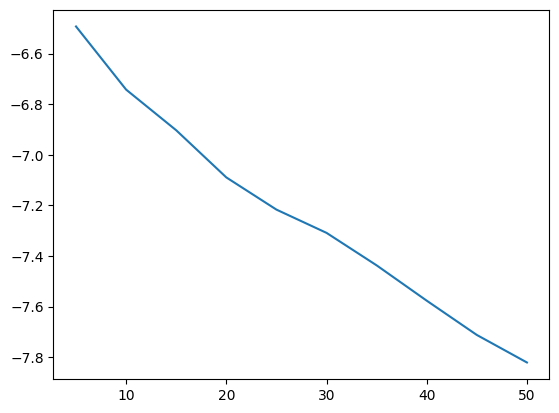

In [595]:
# Takes a while ~ 10-20 mins, more iterations take longer

if 1==1:
    perplexity = list()
    # define a training and testing set
    from sklearn.model_selection import train_test_split
    corpus_train, corpus_test = train_test_split(corpus, test_size = .1)
    for numtopics in range(5, 51, 5): # look at at 5-25 in increments of 5
        lda = LdaMulticore(corpus_train, id2word=dictionary, num_topics=numtopics)
        lda.save(nlppath+'lda{}.lda'.format(numtopics)) # save the model so we can load it up again later w/o running the model
        p = lda.log_perplexity(corpus_test) # compute the perplexity on testing set
        # save numtopics,p to the perplexity list
        perplexity.append([numtopics, p])
        # print out number of topics
        print(numtopics)
    temp = pd.DataFrame(perplexity, columns = ['ntopics', 'perplexity'])
    plt.plot(temp.ntopics, temp.perplexity)

Looks like 50 topics is better

In [596]:
lda = LdaMulticore.load(nlppath+'lda50.lda') # load the trained model

In [597]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [598]:
categories = {
    "Hunting": {
        "archery", "shooting", "optics", "binoculars", "scopes", "rangefinders", "decoys", "blind", "treestand", "hunting_pack",
        "knives", "trail_cam", "dog", "wild_game", "bow", "crossbow", "arrow", "point", "broadhead", "scent", "mossy_oak",
        "compound", "diamond", "ravin", "xt_20-70ibs", "bear", "elk", "deer", "cruzer_10-70ib", "legit_rth_10-70lb",
        "fleetwood_lil_john", "genesis", "realtree", "accubow_2.0", "bear_archery_brave", "barnett_centershot",
        "barnett_vertigo", "killer_instinct", "bear_archery_fusion", "pse_brute", "diamond_archery_edge_max",
        "bear-archery_rant_rth", "barnett_king_rat_target", "barnett_tomcat_2", "barnett_vertigo", "block_6x6", "morrell",
        "rmef_elk_edition", "swhacker", "bloodsport", "rage", "scent_thief", "scentlok", "code_blue", "dead_down_wind",
        "nose_jammer", "tinks", "buck_bomb", "hunter", "hunt"
    },
    "Shooting": {
        "pistol", "revolver", "break_action", "bolt_action", "semi_auto", "lever_action", "receiver", "lower", "pump_action",
        "over_under", "side_by_side", "single_shot", "shot", "reload", "bulltes", "ammo", "ammunition", "dies",
        "reloading_press", "primer", "powder", "muzzleloader", "black_powder", "safe", "vault", "case", "lock", "magazine",
        "clip", "altor", "american_tactical", "auto_ordnance_thompson", "b&t", "beretta", "bergara", "bersa",
        "black_rain_ordinance", "bond_arms", "browning_cz_usa", "canik", "century_arms", "charles_daly", "charter_arms",
        "chiappa", "christiansen_arms", "colt", "cva", "cz_usa", "daniel_defense", "diamondback_firearms", "drd_tactical",
        "e_machines", "excel", "fierce", "fime_group", "fn_america", "franchi", "garaysar", "gforce_arms", "glock",
        "hagelund", "henry", "hi_point", "howa", "iwi", "kalashnikov_usa", "kel_tec", "keystone", "kimber", "kriss", "marlin",
        "mauser", "maverick", "mossberg", "naarms", "noreen_firearms", "panzer", "radical_firearms", "remington", "riley",
        "rossi", "rossi_usa", "ruger", "s&w", "sccy", "sds", "shadow_systems", "sig_sauer", "savage", "springfield",
        "stevens", "taurus", "thompson", "tikka", "traditions", "tytan", "unity", "vortex", "walther", "weatherby",
        "winchester", "zastava", "shotgun", "gun_counter", "gunsmith", "gun_selection", "gun", "weapon", "scope", "rifle", "fire_arm",
        "gun_department", "background_check", "firearm", "process"
    },
    "Fishing": {
        "spinning", "casting", "trolling", "saltwater", "conventional", "pin_rod", "rod_storage", "rush_creek", "13_fishing",
        "abu_garcia", "allen", "american_spirit", "ande_rods", "ardent", "bw_sports", "bnm", "berkley", "billfisher", "bubba",
        "bull_bay_rods", "calcutta", "cashion_fishing_rods", "daiwa", "denali_rods", "dobyns", "douglas", "dubro", "duckett",
        "eagle_claw", "reel", "fly_reel", "lure", "line", "bait", "fishing_vest", "leader", "tippet", "net", "spool", "tying",
        "flies", "hard_bait", "soft_bait", "jig", "rig", "fish_attractant", "gulp", "fresh_water", "topwater", "shallow",
        "deep", "diver", "sink", "trout", "bass", "salmon", "panfish", "carp", "crappie", "steelhead", "panther_martin", "simms",
        "rapala", "fishing_license", "fishing_equipment", "fly", "stream", "tackle"
   },
    "Camping": {
        "alps_mountaineering", "big_agnes", "browning", "coleman", "eureka", "gazelle", "kelty", "kodiak_canvas", "msr",
        "marmot", "montana_canvas", "canvas", "rightline_gear", "rustic_ridge_stone_glacier", "teton", "wenzel", "wall_tent",
        "backpacking", "camping", "footprint", "3_season", "4_season", "flashlight", "sleeping_bag", "child_carrier",
        "day_pack", "duffel_bag", "stuff_sack", "ditty_bag", "waistpacks", "hydration-pack", "bladder", "sleeping_pad",
        "mummy", "liner", "doublewide", "headlamp", "lantern", "spotlight", "cap_light", "candles", "black_diamond",
        "colemans", "streamlight", "surefire", "tent", "carabiner", "campsuds", "camp_soap", "trowel", "paracord", "saw",
        "axe", "multi-tool", "knife", "fire_starter", "osprey"
    },
    "Boating": {
        "kayak", "bote", "solstice", "inflatable", "raft", "life_jacket", "paddle", "oar", "tube", "pontoon", "towable",
        "air_pump", "bestway", "hydro_force", "kokopelli", "sevylor", "water_shoes", "dry_bag", "trailer", "anchor", "dock"
    },
    "Cooking": {
        "campfire", "dish", "utensil", "spoon", "fork", "knives", "grill", "camp_stove", "dutch_oven", "cookware",
        "camp_kitchen", "griddle", "pellet_grill", "smoker", "grill_box", "fire", "propane", "butane", "camp_chef", "pellet"
    },
    "Clothing": {
        "coat", "jacket", "shirt", "pants", "hoodie", "sweatshirt", "bib", "coverall", "wader", "vest", "rain", "base_layer",
        "work_wear", "socks", "gloves", "hats", "sitka", "kings_camo", "drake_waterfowl", "nomad", "blocker_outdoors",
        "scent_lok", "blaze", "hat", "beanie", "gaiter", "killik", "clothe", "clothing"
    },
    "Footwear": {
        "boots", "shoes", "sandals", "casual", "athletic", "slipper", "winter", "rubber", "western", "snowshoes",
        "boot_dryer", "crispi", "zamberlan", "danner", "lacrosse", "ariat", "hey_dude", "obos", "boot", "shoe"
    }
}


In [599]:
lda.show_topics(50) # show a sample of 10 topics

[(0,
  '0.027*"’ve" + 0.026*"purchase" + 0.025*"gun" + 0.022*"store" + 0.019*"time" + 0.019*"go" + 0.017*"never" + 0.016*"look_like" + 0.015*"law" + 0.013*"bad_experience"'),
 (1,
  '0.028*"part" + 0.023*"sportsman_warehouse" + 0.021*"come" + 0.019*"store" + 0.018*"tell" + 0.017*"would" + 0.017*"take" + 0.015*"know" + 0.015*"call" + 0.013*"work"'),
 (2,
  '0.107*"fishing" + 0.062*"hunting" + 0.054*"camping" + 0.035*"hunt" + 0.034*"fish" + 0.025*"knife" + 0.022*"firearm" + 0.021*"supply" + 0.020*"get" + 0.018*"go"'),
 (3,
  '0.209*"\'s" + 0.168*"sportsman" + 0.104*"warehouse" + 0.034*"cabela" + 0.016*"good" + 0.015*"wish" + 0.015*"experience" + 0.014*"store" + 0.013*"well" + 0.012*"always"'),
 (4,
  '0.076*"order" + 0.041*"store" + 0.040*"online" + 0.031*"get" + 0.029*"pick" + 0.027*"could" + 0.027*"say" + 0.026*"item" + 0.024*"cancel" + 0.015*"one"'),
 (5,
  '0.034*"store" + 0.024*"purchase" + 0.023*"$" + 0.021*"manager" + 0.019*"say" + 0.019*"card" + 0.018*"use" + 0.017*"tell" + 0.017

In [600]:
def categorize_topic(topic_words, category_keywords):
    counts = {}
    for category, keywords in category_keywords.items():
        match_count = sum(1 for word, _ in topic_words if word.lower() in keywords)
        if match_count > 0:
            counts[category] = match_count
    return sorted(counts.items(), key=lambda x: -x[1])


In [601]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [602]:
topics = lda.show_topics(num_topics=50, num_words=15, formatted=False)

topic_category_matches = {}

for topic_id, word_probs in topics:
    matched = categorize_topic(word_probs, categories)
    topic_category_matches[topic_id] = matched

# Display top category match for each topic
for topic_id, matches in topic_category_matches.items():
    top_match = matches[0] if matches else ("Uncategorized", 0)
    print(f"Topic {topic_id}: Most likely category → {top_match[0]} (matched {top_match[1]} words)")


Topic 0: Most likely category → Shooting (matched 2 words)
Topic 1: Most likely category → Boating (matched 1 words)
Topic 2: Most likely category → Camping (matched 2 words)
Topic 3: Most likely category → Uncategorized (matched 0 words)
Topic 4: Most likely category → Uncategorized (matched 0 words)
Topic 5: Most likely category → Hunting (matched 1 words)
Topic 6: Most likely category → Shooting (matched 1 words)
Topic 7: Most likely category → Uncategorized (matched 0 words)
Topic 8: Most likely category → Hunting (matched 2 words)
Topic 9: Most likely category → Uncategorized (matched 0 words)
Topic 10: Most likely category → Camping (matched 1 words)
Topic 11: Most likely category → Shooting (matched 3 words)
Topic 12: Most likely category → Uncategorized (matched 0 words)
Topic 13: Most likely category → Uncategorized (matched 0 words)
Topic 14: Most likely category → Cooking (matched 1 words)
Topic 15: Most likely category → Shooting (matched 1 words)
Topic 16: Most likely cate

In [603]:
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import re

lemmatizer = WordNetLemmatizer()

# Normalize helper
def normalize(word):
    return lemmatizer.lemmatize(word.lower())

# Prepare category keywords
normalized_categories = {
    cat: {normalize(re.sub(r"[^a-zA-Z0-9_]", "", kw)) for kw in kws}
    for cat, kws in categories.items()
}

# Match words based on normalization and substring inclusion
def fuzzy_match(word, keywords):
    for kw in keywords:
        if kw in word or word in kw:
            return True
    return False

def categorize_topic(topic_words, category_keywords):
    counts = defaultdict(float)
    for word, prob in topic_words:
        norm_word = normalize(word)
        for category, keywords in category_keywords.items():
            if fuzzy_match(norm_word, keywords):
                counts[category] += prob
    return sorted(counts.items(), key=lambda x: -x[1])

# Run the matching
topic_category_matches = {}

for topic_id, word_probs in topics:
    matched = categorize_topic(word_probs, normalized_categories)
    topic_category_matches[topic_id] = matched

# Display results
for topic_id, matches in topic_category_matches.items():
    top_match = matches[0] if matches else ("Uncategorized", 0)
    print(f"Topic {topic_id}: Most likely category → {top_match[0]} (score {top_match[1]:.4f})")
    print("Full matches:", matches)
    print("-----")


Topic 0: Most likely category → Shooting (score 0.0596)
Full matches: [('Shooting', 0.059595233760774136), ('Hunting', 0.018929319456219673), ('Fishing', 0.01502151694148779), ('Camping', 0.011976763606071472), ('Cooking', 0.010406533256173134)]
-----
Topic 1: Most likely category → Shooting (score 0.0284)
Full matches: [('Shooting', 0.02835606224834919), ('Clothing', 0.012734330259263515), ('Hunting', 0.012522023171186447), ('Boating', 0.010844280943274498)]
-----
Topic 2: Most likely category → Hunting (score 0.1599)
Full matches: [('Hunting', 0.159937996417284), ('Fishing', 0.1560959443449974), ('Camping', 0.09686324931681156), ('Cooking', 0.04666711762547493), ('Shooting', 0.022020727396011353)]
-----
Topic 3: Most likely category → Hunting (score 0.0116)
Full matches: [('Hunting', 0.011620539240539074), ('Shooting', 0.01116134226322174)]
-----
Topic 4: Most likely category → Hunting (score 0.0599)
Full matches: [('Hunting', 0.059875828213989735), ('Fishing', 0.04000261425971985), 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [604]:
# Rebuild dictionary from topics list for easier access
topic_dict = {topic_id: word_probs for topic_id, word_probs in topics}

# Prepare list for DataFrame
topic_data = []

for topic_id, matches in topic_category_matches.items():
    top_match = matches[0] if matches else ("Uncategorized", 0)
    top_words = ", ".join([word for word, _ in topic_dict[topic_id]])

    topic_data.append({
        "Topic ID": topic_id,
        "Top Words": top_words,
        "Top Category": top_match[0],
        "Match Score": round(top_match[1], 4),
        "All Matches": "; ".join([f"{cat} ({round(score, 4)})" for cat, score in matches]) if matches else "None"
    })

# Create DataFrame
df_master = pd.DataFrame(topic_data)

# Save to CSV
df_master.to_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/Topic_departments_Master.csv", index=False)

In [605]:
df_master.columns


Index(['Topic ID', 'Top Words', 'Top Category', 'Match Score', 'All Matches'], dtype='object')

In [606]:
df_cleaned.columns

Index(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address', 'nstopwords', 'textlen', 'pct_stopwords', 'polarity',
       'subjectivity', 'User Avg Rating', 'parsed'],
      dtype='object')

In [607]:
# Create topic probability dictionary for each review
df_cleaned['topic_probs'] = df_cleaned['parsed'].apply(lambda x: dict(lda[dictionary.doc2bow(x.split())]))



<ipython-input-607-3205583963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['topic_probs'] = df_cleaned['parsed'].apply(lambda x: dict(lda[dictionary.doc2bow(x.split())]))


In [608]:
# Assign most probable topic to each review
df_cleaned['Topic ID'] = df_cleaned['topic_probs'].apply(lambda d: max(d, key=d.get))


<ipython-input-608-1912024223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Topic ID'] = df_cleaned['topic_probs'].apply(lambda d: max(d, key=d.get))


In [609]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [384]:
# Add subcategories
#--- STEP 1: Merge topic-to-department info into review-level data ---
df_final = pd.merge(df_cleaned, df_master[['Topic ID', 'Top Category']], on='Topic ID', how='left')

# --- STEP 2: Subtopic Extraction and Assignment ---
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Make sure parsed text is lowercase for matching
df_final['parsed'] = df_final['parsed'].str.lower()

# Group parsed text by department
grouped = df_final.groupby("Top Category")["parsed"].apply(lambda texts: " ".join(texts)).reset_index()

def extract_top_phrases(text, n=10, ngram_range=(2, 3)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english", max_features=5000)
    X = vectorizer.fit_transform([text])
    freqs = zip(vectorizer.get_feature_names_out(), np.asarray(X.sum(axis=0)).ravel())
    return Counter(dict(freqs)).most_common(n)

# Build initial phrase clusters per department
dept_phrases = {}
for _, row in grouped.iterrows():
    dept = row["Top Category"]
    top_phrases = extract_top_phrases(row["parsed"], n=15)
    dept_phrases[dept] = top_phrases

# Simple example dictionary for subtopic tagging
subtopic_keywords = {
    "Product Quality": [
        "broken", "poor quality", "defective", "doesn't work", "junk",
        "malfunction", "cracked", "flimsy", "wore out", "fell apart",
        "unfortunately product", "good product", "rust", "quality", "quality product" , "stain", "quality"
    ],
    "Inventory/Stock": [
        "out of stock", "sold out", "not available", "backordered",
        "product selection", "everything need", "stock", "couldn’t find",
        "low inventory", "always gone", "variety", "selection",
        "don't have", "can order", "didn't have", "merchandise", "inventory lack",
        "nice selection", "lack_item", "good_selection", "great_selection"
    ],
    "Customer Service": [
        "customer service", "rude", "no help", "unhelpful", "ignored",
        "unavailable", "dismissive", "no one helped", "bad attitude",
        "horrible service", "great customer service", "nice", "friendly",  "people",
        "great help", "help tune", "horrible", "great", "bad", "terrible",
        "staff", "expertise", "minute", "refuse", "helpful", "knowledgeable", "unbothered",
        "great service", "staff", "friendly", "helpful", "staff helpful", "great staff",
        "need help", "good service", "good customer_service", "store manager", "people work",
        "helpful friendly", "staff knowledgable", "wait hour", "ask question", "ask need",
        "wait line", "waste", "time", "help customer", "ask help", "bad customer_service",
        "staff", "snarky", "kind", "help", "hold", "manager", "informative", "gentleman", "worker", "rude",
        "cashier", "employee", "advice"

    ],
    "Pricing": [
        "expensive", "overprice", "price match", "not worth it",
        "deal", "rip off", "high cost", "great price", "good product great price",
        "military discount", "pricey", "sale", "discount", "overpriced",
        "$", "clearance", "good price", "price great", "price high" , "spendy", "reasonable", "expensive",
        "cheap", "overpriced", "price", "pricing", "pricey", "price_point", "fair_price"
    ]
}

# Normalize and flatten keyword list
normalized_subtopic_map = []
for label, phrases in subtopic_keywords.items():
    for phrase in phrases:
        normalized_subtopic_map.append((phrase.lower(), label))

# Assign subtopics based on parsed text  #using fuzzy so typos and partial matches will still match
def get_subtopic_fuzzy(text):
    for subtopic, phrases in subtopic_keywords.items():
        for phrase in phrases:
            if phrase in text:  # substring match instead of exact word match
                return subtopic
    return "Other"


df_final["Subtopic"] = df_final["parsed"].apply(get_subtopic_fuzzy)



In [610]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/topic_category_subtopic.csv', index=False)


In [611]:
print(df_cleaned['Date'].dtype)

datetime64[ns]


In [612]:
lda.show_topics(5)

[(45,
  '0.027*"$" + 0.026*"bring" + 0.025*"buy" + 0.021*"friend" + 0.020*"give" + 0.017*"gun" + 0.016*"back" + 0.016*"purchase" + 0.015*"top" + 0.014*"ring"'),
 (49,
  '0.089*"good_selection" + 0.080*"stuff" + 0.071*"good" + 0.048*"supply" + 0.040*"price" + 0.038*"lot" + 0.034*"clothing" + 0.033*"store" + 0.027*"great" + 0.026*"outdoor_gear"'),
 (25,
  '0.062*"carry" + 0.043*"use" + 0.033*"alot" + 0.031*"rod" + 0.029*"reel" + 0.027*"lur" + 0.026*"almost" + 0.025*"amazon" + 0.024*"buy" + 0.023*"buy_anything"'),
 (5,
  '0.034*"store" + 0.024*"purchase" + 0.023*"$" + 0.021*"manager" + 0.019*"say" + 0.019*"card" + 0.018*"use" + 0.017*"tell" + 0.017*"get" + 0.017*"receipt"'),
 (0,
  '0.027*"’ve" + 0.026*"purchase" + 0.025*"gun" + 0.022*"store" + 0.019*"time" + 0.019*"go" + 0.017*"never" + 0.016*"look_like" + 0.015*"law" + 0.013*"bad_experience"')]

In [613]:
vis = pg.prepare(lda, corpus, dictionary) # construct visualization
# save it as a web page so you can open it up in a browser (download first).
pyLDAvis.save_html(vis, nlppath + 'viz_50.html')
vis # display visualization in notebook

/usr/local/lib/python3.11/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26    -0.203800  0.051502       1        1  6.045490
15    -0.208721 -0.025364       2        1  5.186332
8     -0.076239  0.158515       3        1  3.159611
4     -0.150472 -0.108131       4        1  3.107460
13    -0.185209 -0.032314       5        1  3.048384
32    -0.112019 -0.145207       6        1  3.008290
35     0.272099  0.055810       7        1  2.854063
18    -0.163621 -0.073017       8        1  2.800993
29     0.286731  0.122370       9        1  2.584924
5     -0.173907 -0.071736      10        1  2.580946
47     0.009653 -0.073380      11        1  2.403493
22    -0.147701  0.035258      12        1  2.330677
3      0.033059  0.003234      13        1  2.308640
36     0.136836 -0.066215      14        1  2.196842
37    -0.097587 -0.005837      15        1  2.193678
24    -0.176723  0.104505      16        1  2.179935
19    -0.124463  0.000474      17        1  2.172069
44    -0.168462  0.002388      18        1  2.044062
6     -0.065567  0.078838      19        1  1.984749
49     0.260699 -0.084090      20        1  1.980539
0     -0.162883  0.022250      21        1  1.974919
2      0.144339  0.035190      22        1  1.946752
38     0.108134 -0.098688      23        1  1.928233
1     -0.169573 -0.013624      24        1  1.927836
21     0.082831 -0.076512      25        1  1.918798
48     0.146265  0.188960      26        1  1.896615
40     0.210889 -0.043900      27        1  1.866618
45    -0.172425 -0.010213      28        1  1.818601
23     0.171435 -0.161146      29        1  1.776137
43     0.143818 -0.092092      30        1  1.704737
41    -0.002853  0.040904      31        1  1.631276
20     0.116668 -0.086371      32        1  1.621787
39    -0.050564  0.113857      33        1  1.616716
42    -0.139653  0.018511      34        1  1.585369
30    -0.086072  0.040705      35        1  1.573325
31    -0.063926 -0.005700      36        1  1.540411
12    -0.099599  0.002644      37        1  1.333738
9     -0.034563  0.145241      38        1  1.302062
16     0.082242  0.089349      39        1  1.253117
25    -0.035428 -0.046118      40        1  1.213086
17     0.202976  0.118750      41        1  1.161755
14     0.107052 -0.109667      42        1  1.159835
28    -0.077035 -0.028444      43        1  1.151820
34     0.156119  0.011206      44        1  1.133544
33    -0.011029 -0.076774      45        1  1.100604
11     0.044436  0.101126      46        1  1.100155
27     0.128625 -0.109041      47        1  0.960042
10     0.082769  0.121029      48        1  0.928295
7      0.125933  0.037593      49        1  0.877282
46     0.106488 -0.056629      50        1  0.825358, topic_info=                Term         Freq        Total Category  logprob  loglift
9              great  8930.000000  8930.000000  Default  30.0000  30.0000
17             place  7961.000000  7961.000000  Default  29.0000  29.0000
53             price  5850.000000  5850.000000  Default  28.0000  28.0000
140             nice  3561.000000  3561.000000  Default  27.0000  27.0000
61                's  3465.000000  3465.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
296  great_selection    76.063190  1625.485360  Topic50  -4.1723   1.7351
17             place   107.345404  7961.071541  Topic50  -3.8278   0.4908
23         selection    60.357977  2682.021296  Topic50  -4.4036   1.0031
294            stuff    54.983436  1795.549442  Topic50  -4.4969   1.3111
382        available    48.045115   717.817705  Topic50  -4.6318   2.0930

[2438 rows x 6 columns], token_table=      Topic      Freq Term
term                      
246       1  0.002734    $
246       2  0.032810    $
246       4  0.013671    $
246       5  0.142858    $
246       6  0.004101    $
...     ...       ...  ...
30       33  0.002616    👍
30       44  0.991451    👍
1446 

In [614]:
from wordcloud import WordCloud

In [615]:
df_rest.head()

,Store Address,parsed
0,"10145 W McDowell Rd, Avondale, AZ 85392","[good, customer_service, good, price, wide_sel..."
1,"1020 N Stratford Rd Ste D, Moses Lake, WA 98837","[one_stop_shop, anything, hunt, relate, well, ..."
2,"1038 S Castle Dome Ave, Yuma, AZ 85365","[sportsman, 's, pro, gun, would, like, give, p..."
3,"10462 S River Heights Dr, South Jordan, UT 84095","[covid, summertime, open_till, 9, look, fishin..."
4,"10536 Trinity Pkwy, Stockton, CA 95219","[hardly, shop, always, good, experience, come,..."


In [616]:

biz = '10462 S River Heights Dr, South Jordan, UT 84095'
r = df_rest.loc[df_rest['Store Address']==biz]
idx = r.index[0]
rname = list(r['Store Address'])[0]
review = list(r.parsed)[0]
# to use the wordcloud libary, we need to transform
# the tf-idf from list of bag of tokens, frequencies
# dictionary of words to frequencies
w2freq = {dictionary.id2token[t]:f for t,f in tfidf[corpus[idx]]}

In [617]:
wc = WordCloud(width = 1920, height = 1080).fit_words(w2freq) # specify w/h for HD figure

(-0.5, 1919.5, 1079.5, -0.5)

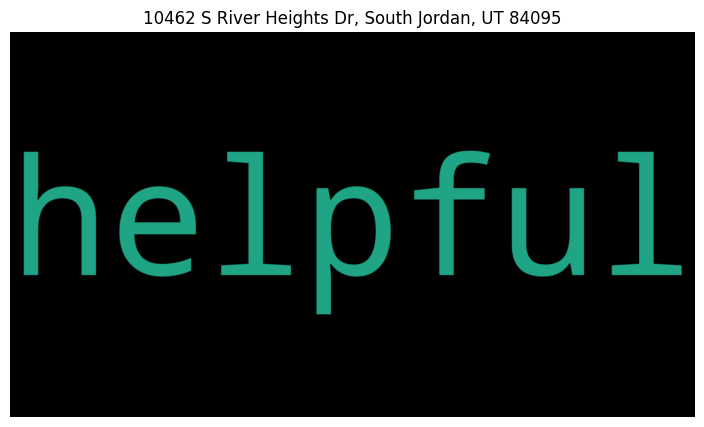

In [618]:
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation='bilinear')
plt.title(rname)
plt.axis('off')

Word cloud representation for each topic:

In [619]:
 ### I will run this if someone wants to see it- but I don't think anyone will.

 if 1==1:
    numtopics = 50
    top_n_words = 5  # How many topic words to include in filename (keep it readable!)

    # Folder to save images
    ldawcpath = '/content/drive/MyDrive/Colab Notebooks/Capstone/Word Cloud Images/viz lda corpus dictionary'
    os.makedirs(ldawcpath, exist_ok=True)

    for top in range(numtopics):
        # Get top 100 terms for the topic
        topic_terms = lda.get_topic_terms(top, 100)
        w2freq = {dictionary.id2token[t]: f for t, f in topic_terms}

        # Create a short label for the topic using the top N words
        top_words = [dictionary.id2token[t] for t, _ in topic_terms[:top_n_words]]
        top_words_str = "_".join(top_words)
        # Sanitize the string to avoid unsafe characters
        top_words_str = top_words_str.replace('/', '_').replace('\\', '_').replace(' ', '_').replace(',', '')

        # Generate word cloud
        wc = WordCloud(width=1920, height=1080, background_color='white').fit_words(w2freq)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {top}: {" ".join(top_words)}')

        # Save with readable filename
        filename = f'lda_topic_{top}_{top_words_str}.png'
        plt.savefig(os.path.join(ldawcpath, filename), bbox_inches='tight', dpi=140)
        plt.close()


<ipython-input-619-2776237408>:33: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(ldawcpath, filename), bbox_inches='tight', dpi=140)


Using the distribution over latent topics, we can figure out which documents are similar to each other using cosine similarity. If we apply this similartiy at the review level, we can find similar reviews. If we apply this similarity at the store level, we can find similar stores based on topic (not sentiment)

In [620]:
# apply lda transformation to bow representation of corpus at store level
# remember df_rest is 1 row = all reviews of 1 store
lda.minimum_probability = 0. # set min probability to 0 (otherwise will ignore topics with small probabilities)
df_rest['topic_probs'] = df_rest.parsed.apply(lambda x: dict(lda[dictionary.doc2bow(x)]))

In [621]:
# create 1 column for each topic
# call the columns top_0, top_1, etc.

for top in range(50):
    df_rest['top_{}'.format(top)] = df_rest.topic_probs.apply(lambda x: x.get(top))


In [622]:
df_rest.head()

,Store Address,parsed,topic_probs,top_0,top_1,top_2,top_3,top_4,top_5,top_6,...,top_40,top_41,top_42,top_43,top_44,top_45,top_46,top_47,top_48,top_49
0,"10145 W McDowell Rd, Avondale, AZ 85392","[good, customer_service, good, price, wide_sel...","{0: 0.028337346, 1: 0.027459167, 2: 0.01680959...",0.028337,0.027459,0.016810,0.033066,0.029530,0.025643,0.025043,...,0.021196,0.013148,0.018302,0.007513,0.018134,0.012242,0.007176,0.031114,0.011446,0.018932
1,"1020 N Stratford Rd Ste D, Moses Lake, WA 98837","[one_stop_shop, anything, hunt, relate, well, ...","{0: 0.026433853, 1: 0.022808919, 2: 0.02292688...",0.026434,0.022809,0.022927,0.025643,0.023231,0.014430,0.007439,...,0.040751,0.034255,0.014932,0.017479,0.033710,0.004335,0.004225,0.019384,0.020129,0.043044
2,"1038 S Castle Dome Ave, Yuma, AZ 85365","[sportsman, 's, pro, gun, would, like, give, p...","{0: 0.015452321, 1: 0.017883733, 2: 0.02736455...",0.015452,0.017884,0.027365,0.018325,0.022927,0.020259,0.013762,...,0.022364,0.024990,0.011091,0.018031,0.026206,0.009658,0.008616,0.032856,0.017419,0.029753
3,"10462 S River Heights Dr, South Jordan, UT 84095","[covid, summertime, open_till, 9, look, fishin...","{0: 0.036230735, 1: 0.0133563075, 2: 0.0115554...",0.036231,0.013356,0.011555,0.042666,0.026368,0.029391,0.025148,...,0.008264,0.012613,0.025242,0.014435,0.018725,0.020442,0.006449,0.014983,0.018181,0.012659
4,"10536 Trinity Pkwy, Stockton, CA 95219","[hardly, shop, always, good, experience, come,...","{0: 0.027420871, 1: 0.014891477, 2: 0.02339296...",0.027421,0.014891,0.023393,0.013089,0.045379,0.028141,0.022370,...,0.017326,0.017462,0.009529,0.004782,0.024961,0.013214,0.010097,0.026612,0.017893,0.017959


In [623]:
topiccols = [c for c in df_rest.columns if 'top_' in c] # create a list of topic prob columns
print(topiccols)

['top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6', 'top_7', 'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13', 'top_14', 'top_15', 'top_16', 'top_17', 'top_18', 'top_19', 'top_20', 'top_21', 'top_22', 'top_23', 'top_24', 'top_25', 'top_26', 'top_27', 'top_28', 'top_29', 'top_30', 'top_31', 'top_32', 'top_33', 'top_34', 'top_35', 'top_36', 'top_37', 'top_38', 'top_39', 'top_40', 'top_41', 'top_42', 'top_43', 'top_44', 'top_45', 'top_46', 'top_47', 'top_48', 'top_49']


In [624]:
# compute pairwise similarities

from sklearn.metrics import pairwise_distances

distances = pd.DataFrame(pairwise_distances(np.array(df_rest[topiccols]), metric = 'cosine'))

In [625]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [626]:
# Rename columns and row indices
distances.columns = df_rest['Store Address']
distances.index = df_rest['Store Address']
#distances['Store Address'] = list(df_rest['name']) # create a column of stores- removed this line since I don't have a name and business ID...

In [628]:
# Pick a random store by its Store Address
r = df_rest.sample(1)
rname = r['Store Address'].values[0]
print(f"Finding stores most similar to:\n👉 {rname}")

# Sort distances by the chosen store’s column (the store address)
sorted_distances = distances.sort_values(by=rname)

# Remove the store itself from both rows and columns
sorted_distances = sorted_distances.drop(index=rname, columns=rname)

# Grab the top 10 closest stores (lowest cosine distance)
similar_stores = sorted_distances.index[:10]

print("\n🧭 Top 10 most similar stores by topic distribution:")
for store in similar_stores:
    print(f"🏬 {store}")


Finding stores most similar to:
👉 1638 W Poplar St, Walla Walla, WA 99362

🧭 Top 10 most similar stores by topic distribution:
🏬 611 Valley Mall Pkwy, East Wenatchee, WA 98802
🏬 889 S Main St, Cedar City, UT 84720
🏬 2231 E Rte 66, Flagstaff, AZ 86004
🏬 3795 Clemson Blvd, Anderson, SC 29621
🏬 2002 Thain Grd, Lewiston, ID 83501
🏬 3306 Kietzke Ln, Reno, NV 89502
🏬 2464 US-6 And 50 Ste A, Grand Junction, CO 81505
🏬 1567 Dewar Dr, Rock Springs, WY 82901
🏬 2200 War Admiral Way Suite 140, Lexington, KY 40509
🏬 44402 Sterling Hwy, Soldotna, AK 99669


In [629]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [630]:
# Randomly pick a store
r = df_rest.sample(1)
rname = r['Store Address'].values[0]

print(f"📍 Selected store:\n👉 {rname}\n")

# Get top 10 most similar stores (excluding the store itself)
top_similar = (
    distances.sort_values(by=rname)
             .drop(index=rname)      # drop the selected store itself
             .head(10)
)

# Print results
print("🧭 Top 10 most similar stores by topic distribution:")
for store in top_similar.index:
    print(f"🏬 {store}")


📍 Selected store:
👉 830 County Rd 64 Unit 17, Elmira, NY 14903

🧭 Top 10 most similar stores by topic distribution:
🏬 800 Brevard Rd Ste 901, Asheville, NC 28806
🏬 555 N Chelton Rd, Colorado Springs, CO 80909
🏬 520 Clock Tower Way, Crescent Springs, KY 41017
🏬 63492 NW Hunnell Rd, Bend, OR 97703
🏬 2075 Interchange Rd, Erie, PA 16506
🏬 2230 N Telshor Blvd, Las Cruces, NM 88011
🏬 5215 Century Ave, Kalamazoo, MI 49006
🏬 1675 Rocky Mountain Ave, Loveland, CO 80538
🏬 3745 E Lincolnway, Cheyenne, WY 82001
🏬 6720 N Division St, Spokane, WA 99208


In [631]:
# Randomly pick a store
r = df_rest.sample(1)
rname = r['Store Address'].values[0]

print(f"📍 Selected store:\n👉 {rname}\n")

# Get top 10 most similar stores (excluding the store itself)
top_similar = (
    distances.sort_values(by=rname)
             .drop(index=rname)      # drop the selected store itself
             .head(10)
)

# Print results
print("🧭 Top 10 most similar stores by topic distribution:")
for store in top_similar.index:
    print(f"🏬 {store}")

📍 Selected store:
👉 300 Kensington Blvd, Slidell, LA 70458

🧭 Top 10 most similar stores by topic distribution:
🏬 476 Piney Grove Rd, Columbia, SC 29210
🏬 6241 Perimeter Dr #101, Chattanooga, TN 37421
🏬 750 W 14 Mile Rd, Troy, MI 48083
🏬 8757 Delta Market Dr, Lansing, MI 48917
🏬 1260 Lancaster Dr SE, Salem, OR 97317
🏬 468 N Thompson Ln, Murfreesboro, TN 37129
🏬 1710 Delta Waters Rd, Medford, OR 97504
🏬 11 W 84th Ave, Thornton, CO 80260
🏬 2230 N Telshor Blvd, Las Cruces, NM 88011
🏬 3910 River Point Pkwy, Sheridan, CO 80110


In [632]:
# Randomly pick a store
r = df_rest.sample(1)
rname = r['Store Address'].values[0]

print(f"📍 Selected store:\n👉 {rname}\n")

# Get top 10 most similar stores (excluding the store itself)
top_similar = (
    distances.sort_values(by=rname)
             .drop(index=rname)      # drop the selected store itself
             .head(10)
)

# Print results
print("🧭 Top 10 most similar stores by topic distribution:")
for store in top_similar.index:
    print(f"🏬 {store}")

📍 Selected store:
👉 701 Marks St, Henderson, NV 89014

🧭 Top 10 most similar stores by topic distribution:
🏬 6640 Lonetree Blvd, Rocklin, CA 95765
🏬 10145 W McDowell Rd, Avondale, AZ 85392
🏬 5647 Centennial Center Blvd, Las Vegas, NV 89149
🏬 1750 S Greenfield Rd, Mesa, AZ 85206
🏬 3945 W Costco Dr, Tucson, AZ 85741
🏬 3500 Capital City Mall Dr, Camp Hill, PA 17011
🏬 9401 SE 82nd Ave, Portland, OR 97086
🏬 120 31st Ave SE G, Puyallup, WA 98374
🏬 11505 NE Fourth Plain Blvd Ste H9, Vancouver, WA 98662
🏬 1450 N Renaissance Blvd NE, Albuquerque, NM 87107


In [633]:
# Threshold for similarity (tune this based on what “similar” means for you)
threshold = 0.50

# Keep track of visited stores
visited = set()
store_groups = []

for store in distances.columns:
    if store not in visited:
        # Get stores similar to current store
        similar_stores = distances[store][distances[store] >= threshold].index.tolist()

        # Avoid re-adding already visited stores
        group = [s for s in similar_stores if s not in visited]
        if group:
            visited.update(group)
            store_groups.append(group)


In [634]:
# Print the groups
for i, group in enumerate(store_groups, 1):
    print(f"🗂️ Group {i} ({len(group)} stores):")
    for store in group:
        print(f"  🏬 {store}")
    print()


🗂️ Group 1 (1 stores):
  🏬 4030 Murdoch Ave, Parkersburg, WV 26105

🗂️ Group 2 (1 stores):
  🏬 5195 Redwood Dr, Rohnert Park, CA 94928

🗂️ Group 3 (2 stores):
  🏬 1475 W 9000 S suite a, West Jordan, UT 84088
  🏬 2010 N Federal Blvd, Riverton, WY 82501

🗂️ Group 4 (5 stores):
  🏬 1630 S 5070 W Ste. 200, Salt Lake City, UT 84104
  🏬 1630 S 5070 W, Salt Lake City, UT 84104
  🏬 27550 Eucalyptus Ave, Moreno Valley, CA 92555
  🏬 4421 S White Mountain Rd, Show Low, AZ 85901
  🏬 5225 S Calle Santa Cruz, South Tucson, AZ 85706

🗂️ Group 5 (1 stores):
  🏬 2585 Tuscany St, Corona, CA 92881

🗂️ Group 6 (1 stores):
  🏬 5491 Lone Tree Wy, Brentwood, CA 94513

🗂️ Group 7 (2 stores):
  🏬 1638 W Poplar St, Walla Walla, WA 99362
  🏬 889 S Main St, Cedar City, UT 84720

🗂️ Group 8 (2 stores):
  🏬 240 Town Center Pkwy, Santee, CA 92071
  🏬 8468 N Friant Rd, Fresno, CA 93720

🗂️ Group 9 (1 stores):
  🏬 3451 S Rio Grande Ave C, Montrose, CO 81401



The above stores are 50% similar. The Montrose store printed because its so unique

In [635]:
print(distances.iloc[:5, :5])

Store Address                                     10145 W McDowell Rd, Avondale, AZ 85392  \
Store Address                                                                               
10145 W McDowell Rd, Avondale, AZ 85392                                          0.000000   
1020 N Stratford Rd Ste D, Moses Lake, WA 98837                                  0.193690   
1038 S Castle Dome Ave, Yuma, AZ 85365                                           0.181197   
10462 S River Heights Dr, South Jordan, UT 84095                                 0.108033   
10536 Trinity Pkwy, Stockton, CA 95219                                           0.053329   

Store Address                                     1020 N Stratford Rd Ste D, Moses Lake, WA 98837  \
Store Address                                                                                       
10145 W McDowell Rd, Avondale, AZ 85392                                                  0.193690   
1020 N Stratford Rd Ste D, Moses Lake, WA 988

In [636]:
threshold = 0.4
visited = set()
store_groups = []

for store in distances.columns:
    if store not in visited:
        similar_stores = distances[store][distances[store] >= threshold].index.tolist()
        group = [s for s in similar_stores if s not in visited]
        if group:
            visited.update(group)
            store_groups.append(group)

# Now print
for i, group in enumerate(store_groups, 1):
    print(f"🗂️ Group {i} ({len(group)} stores):")
    for store in group:
        print(f"  🏬 {store}")
    print()


🗂️ Group 1 (3 stores):
  🏬 1475 W 9000 S suite a, West Jordan, UT 84088
  🏬 2010 N Federal Blvd, Riverton, WY 82501
  🏬 4030 Murdoch Ave, Parkersburg, WV 26105

🗂️ Group 2 (7 stores):
  🏬 1630 S 5070 W Ste. 200, Salt Lake City, UT 84104
  🏬 1630 S 5070 W, Salt Lake City, UT 84104
  🏬 2585 Tuscany St, Corona, CA 92881
  🏬 27550 Eucalyptus Ave, Moreno Valley, CA 92555
  🏬 5195 Redwood Dr, Rohnert Park, CA 94928
  🏬 5225 S Calle Santa Cruz, South Tucson, AZ 85706
  🏬 5491 Lone Tree Wy, Brentwood, CA 94513

🗂️ Group 3 (14 stores):
  🏬 1567 Dewar Dr, Rock Springs, WY 82901
  🏬 1638 W Poplar St, Walla Walla, WA 99362
  🏬 2015 U.S. Hwy 40, Vernal, UT 84078
  🏬 226601 Rib Mountain Dr, Wausau, WI 54401
  🏬 2323 N Reserve St, Missoula, MT 59808
  🏬 2503 Grand Ave, Laramie, WY 82070
  🏬 3451 S Rio Grande Ave C, Montrose, CO 81401
  🏬 4026 Wards Rd STE D, Lynchburg, VA 24502
  🏬 4120 E 2nd St, Casper, WY 82609
  🏬 4421 S White Mountain Rd, Show Low, AZ 85901
  🏬 5326 N Nevada Ave, Northeast Colora

The above stores are more than 40% similar- based on this model cosigns model..




In a similar vein, let's look at what people who rated a store positively and negatively have to say about it.

In [637]:
# Choose one store address to filter by
selected_address = '2990 N Sanders St, Helena, MT 59601'

In [638]:
# Filter reviews for that store address (case-sensitive, but you could do case-insensitive if needed)
pdc = df_final[df_final['Store Address'] == selected_address].reset_index(drop=True)


In [639]:
# Show top categories and subtopics by star rating for the selected store
for rating in sorted(pdc['Rating'].unique()):
    print(f"\n⭐ Rating: {rating} Stars — {selected_address}")

    group = pdc[pdc['Rating'] == rating]

    # Top Categories
    cat_counts = group['Top Category'].value_counts().head(5)
    print("Top Categories:")
    for cat, count in cat_counts.items():
        print(f"  - {cat} ({count})")

    # Top Subtopics
    sub_counts = group['Subtopic'].value_counts().head(5)
    print("Top Subtopics:")
    for sub, count in sub_counts.items():
        print(f"  - {sub} ({count})")



⭐ Rating: 1 Stars — 2990 N Sanders St, Helena, MT 59601
Top Categories:
  - Hunting (9)
  - Shooting (6)
  - Clothing (4)
  - Fishing (3)
  - Camping (2)
Top Subtopics:
  - Customer Service (16)
  - Other (6)
  - Inventory/Stock (1)
  - Pricing (1)

⭐ Rating: 2 Stars — 2990 N Sanders St, Helena, MT 59601
Top Categories:
  - Camping (3)
  - Hunting (3)
  - Shooting (2)
Top Subtopics:
  - Pricing (2)
  - Customer Service (2)
  - Inventory/Stock (2)
  - Other (1)
  - Product Quality (1)

⭐ Rating: 3 Stars — 2990 N Sanders St, Helena, MT 59601
Top Categories:
  - Hunting (6)
  - Clothing (4)
  - Shooting (4)
  - Uncategorized (2)
  - Fishing (1)
Top Subtopics:
  - Customer Service (7)
  - Pricing (4)
  - Other (4)
  - Inventory/Stock (2)
  - Product Quality (1)

⭐ Rating: 4 Stars — 2990 N Sanders St, Helena, MT 59601
Top Categories:
  - Shooting (25)
  - Clothing (18)
  - Hunting (15)
  - Camping (6)
  - Fishing (5)
Top Subtopics:
  - Customer Service (28)
  - Inventory/Stock (20)
  - Oth

In [640]:
# Filter for reviews where subtopic is 'Other'
other_reviews = df_final[df_final["Subtopic"] == "Other"]

# Show columns of interest
other_reviews_subset = other_reviews[[
    "Store Address", "Rating", "Top Category", "parsed", "Review Text"
]]

# Optional: Limit to just one store
store_reviews = other_reviews_subset[
    other_reviews_subset["Store Address"] == "2990 N Sanders St, Helena, MT 59601"
]

# View top 20 rows
store_reviews.tail(5)


,Store Address,Rating,Top Category,parsed,Review Text
39535,"2990 N Sanders St, Helena, MT 59601",3,Clothing,place go look woman 's anything\n,Not the place to go if looking for women's ANY...
39628,"2990 N Sanders St, Helena, MT 59601",5,Hunting,everything angler hunter need\n,Has everything an angler or hunter need.
39653,"2990 N Sanders St, Helena, MT 59601",5,Hunting,call return fishing_pole break say would_call ...,I called in about returning a fishing pole tha...
43859,"2990 N Sanders St, Helena, MT 59601",5,Hunting,go aryn awesome customer_service bow purchase\n,Go Aryn...awesome customer service on a bow pu...
44426,"2990 N Sanders St, Helena, MT 59601",1,Shooting,big_box store local business please support_lo...,Big box store. NOT A LOCAL BUSINESS!!! Please ...


In [641]:
# find topics for 1-5 star reviews
pdc_by_star = pdc.groupby('Rating')['parsed'].apply(lambda x: ' '.join(list(x))).str.split().reset_index()

In [642]:
print(pdc_by_star.head())

   Rating                                             parsed
0       1  [horrible, service, many, teen, work, concern,...
1       2  [price, local, vibe, like, walmart, sporting_g...
2       3  [disappointed, meat, seasoning, selection, wan...
3       4  [nice, friendly, people, pretty_good, selectio...
4       5  [fabulous, selection, shoe, boot, shoe, manage...


In [643]:
# create column of topic probabilities dicitonaries
pdc_by_star['topic_probs'] = pdc_by_star.parsed.apply(lambda x: dict(lda[dictionary.doc2bow(x)]))

In [644]:
# create column of probabilities for each topic
for top in range(50):
    pdc_by_star['top_{}'.format(top)] = pdc_by_star.topic_probs.apply(lambda x: x.get(top))

# get columns with topic probabilities
topiccols = [c for c in pdc_by_star.columns if 'top_' in c] # create a list of topic prob columns

In [645]:
pdc_by_star = pdc_by_star[topiccols].T # flip the dataframe so that rows become columns
pdc_by_star.columns = list(range(1,6)) # star ratings as column names

In [646]:
# look at the top 5 topics for 1 star ratings
pdc_by_star.sort_values(by = 1, ascending = False).head(5)

,1,2,3,4,5
top_15,0.146332,0.000220,0.000144,0.025202,0.015894
top_26,0.101342,0.000220,0.000144,0.000042,0.012952
top_44,0.095854,0.000220,0.000144,0.012058,0.005808
top_24,0.084219,0.000220,0.000144,0.005578,0.003008
top_37,0.082181,0.131909,0.000144,0.000042,0.027533


In [647]:
lda.show_topic(10)

[('hunting_fishing', 0.08004366),
 ('store', 0.043597296),
 ('camping', 0.035678923),
 ('need', 0.032705642),
 ('informative', 0.030471267),
 ('great', 0.029595984),
 ('enough', 0.026524551),
 ('browse', 0.024769388),
 ('team', 0.019277109),
 ('employee', 0.017533895)]

In [648]:
lda.show_topic(32)

[('store', 0.05787889),
 ('website', 0.027247818),
 ('day', 0.026146475),
 ('order', 0.025599727),
 ('say', 0.024641022),
 ('email', 0.024263361),
 ('stock', 0.023928558),
 ('item', 0.02229187),
 ('online', 0.019805916),
 ('pick', 0.01951974)]

In [649]:
# let's look at 2 star reviews
pdc_by_star.sort_values(by = 2, ascending = False).head(5)

,1,2,3,4,5
top_13,0.063240,0.143554,0.000144,0.009234,0.000019
top_37,0.082181,0.131909,0.000144,0.000042,0.027533
top_22,0.022956,0.128710,0.042918,0.000042,0.013491
top_43,0.013211,0.113590,0.045476,0.044296,0.032015
top_1,0.000034,0.080865,0.000144,0.000042,0.000019


In [650]:
lda.show_topic(13)

[('say', 0.035498567),
 ('return', 0.032203812),
 ('go', 0.022979468),
 ('store', 0.019264614),
 ('purchase', 0.019138731),
 ('tell', 0.018667001),
 ('get', 0.015307845),
 ('sign', 0.015072111),
 ('employee', 0.013977558),
 ('even', 0.013683873)]

In [651]:
lda.show_topic(37)

[('’s', 0.070590734),
 ('’', 0.02574816),
 ('sportsman', 0.024632338),
 ('buy', 0.019964872),
 ('store', 0.019239107),
 ('go', 0.0162229),
 ('bullet', 0.01517404),
 ('shop', 0.014828849),
 ('local', 0.0120488275),
 ('ever', 0.010592537)]

In [652]:
# Lets look at 4 star reviews
pdc_by_star.sort_values(by = 4, ascending = False).head(5)

,1,2,3,4,5
top_49,0.005054,0.00022,0.031675,0.100939,0.047947
top_35,0.000034,0.00022,0.000144,0.064430,0.078988
top_40,0.000034,0.00022,0.032420,0.057311,0.033378
top_21,0.000309,0.00022,0.000144,0.050675,0.027673
top_43,0.013211,0.11359,0.045476,0.044296,0.032015


In [653]:
lda.show_topic(47)

[('ammo', 0.19058391),
 ('gun', 0.1237657),
 ('shelf', 0.033323176),
 ('buy', 0.027933545),
 ('ammunition', 0.027323667),
 ('ok', 0.022974426),
 ('stock', 0.019769132),
 ('get', 0.019196257),
 ('empty', 0.018020805),
 ('$', 0.017062398)]

In [654]:
# Lets look at 5 star reviews
pdc_by_star.sort_values(by = 5, ascending = False).head(5)

,1,2,3,4,5
top_35,0.000034,0.000220,0.000144,0.064430,0.078988
top_29,0.000034,0.000220,0.099228,0.038622,0.073036
top_49,0.005054,0.000220,0.031675,0.100939,0.047947
top_36,0.000034,0.024505,0.043332,0.018093,0.045341
top_31,0.000034,0.000220,0.000144,0.010210,0.035456


In [655]:
lda.show_topic(5)

[('store', 0.033702273),
 ('purchase', 0.024023447),
 ('$', 0.022776049),
 ('manager', 0.021320594),
 ('say', 0.018932635),
 ('card', 0.018686844),
 ('use', 0.017751044),
 ('tell', 0.017045857),
 ('get', 0.016871223),
 ('receipt', 0.016730411)]

In [656]:
print(df_cleaned['Date'].dtype)


datetime64[ns]


In [658]:
df_cleaned.columns

Index(['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience',
       'Store Address', 'nstopwords', 'textlen', 'pct_stopwords', 'polarity',
       'subjectivity', 'User Avg Rating', 'parsed'],
      dtype='object')

In [672]:
import pandas as pd
import spacy
from tqdm import tqdm
from datetime import datetime
import re
import sys

# Load spaCy model (download if missing)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model...")
    !{sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1.tar.gz
    nlp = spacy.load("en_core_web_sm")

# Load dataset and ensure Date is datetime (raise error if invalid)
df_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/NLP/PARSED/allsportsmansparsedphrasemodels.csv")
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='raise')

# Filter rows where Date >= 2020-01-01 (datetime filtering, no conversion to string)
df_cleaned = df_cleaned[df_cleaned['Date'] >= pd.Timestamp('2020-01-01')].copy()

# Optional: further filter for last 6 years from today
cutoff_date = pd.Timestamp(datetime.now().replace(year=datetime.now().year - 6))
df_filtered = df_cleaned[df_cleaned['Date'] >= cutoff_date].copy()

print(f"📆 {len(df_filtered):,} reviews retained from the past 6 years.")

# Setup tqdm for progress bars
tqdm.pandas()

# ✅ Define filters and denylist
department_keywords = {'hunting', 'fishing', 'camping', 'boating', 'clothing', 'cooking'}
subtopic_keywords = {'price', 'pricing', 'quality', 'inventory', 'customer', 'service', 'staff'}
# ✅ Define filters and denylist
department_keywords = {'hunting', 'fishing', 'camping', 'boating', 'clothing', 'cooking'}
subtopic_keywords = {'price', 'pricing', 'quality', 'inventory', 'customer', 'service', 'staff'}
denylist = {
    '06:00 hrs', '190gr', '4 st croix', 'a++', 'a. joke', 'absolutely ridiculous',
    'abundance', 'accidentally', 'action', 'activy store', 'addendum', 'aftter', 'airsoft',
    'alaska', 'albuquerque', 'altras', 'ammo', 'ammo bros', 'ammo selection', 'amp',
    'appraisal', 'ar', 'archer', 'ariat', 'ariat cowboy', 'armor', 'armour', 'atv',
    'avid angler', 'awesome store', 'az', 'backassward', 'barber', 'barbie', 'bass',
    'bass pro', 'bass pro / cabela\'s', 'bass pro gainesville', 'bass pro shop',
    'bass pro shop tacoma', 'bbq', 'benchmade', 'best sportsman\'s', 'better', 'biden',
    'blessings', 'bologna', 'bonita sportsman wholesale', 'boo', 'bought', 'bow', 'bows',
    'box', 'box)but', 'buck', 'buddy heater', 'bummer', 'bun', 'bush', 'buyer beware',
    'bÃ¤ss', 'cabela', 'cabela bass pro shop', 'cabelas', 'cabelaâ€™s/ bass pro shop',
    'cabella', 'camelback', 'cannot', 'canyon', 'carhartt', 'caribou', 'cashier',
    'cashier appraisal', 'charcoal', 'chattanooga', 'chico sportsman\'s', 'chinook',
    'citadel', 'coleman', 'coleman propane', 'colt 1861', 'corky', 'costco lane',
    'costumer', 'covid', 'crappie', 'crispi valdres', 'crocs', 'crossbow', 'cursed',
    'customer care', 'cz p10s', 'dad', 'date', 'daughter', 'dave anderson masonry',
    'definitely', 'delay', 'deng', 'dick', 'dick sporting', 'doesnt want', 'domino',
    'driver dun', 'dundee', 'dunhams', 'dysart', 'elk camp', 'elk grove', 'ete', 'eunuchs',
    'exped', 'ez9', 'falls', 'felt', 'ferris', 'fingers', 'firearm', 'firearm counter',
    'firearms license', 'fishing gear', 'fishing license', 'fishy fishy', 'flash',
    'floor balloon', 'forced bob wards', 'free gift', 'fred meyers', 'full story - walked',
    'funny', 'g. p. c.', 'gander mountain', 'george whoâ€™s', 'gernerous',
    'glad', 'glad rei', 'glock', 'go', 'goatguns', 'god', 'godforsaken', 'good sportsman\'s',
    'gore tex', 'grade f', 'grandma', 'grandmother', 'grandpa', 'granted this sportsman\'s',
    'great customer', 'great sportsman\'s', 'great store', 'green tips', 'green top',
    'greenwood', 'greggory backpack', 'grizzly', 'gun counter', 'gunbroker', 'guns',
    'guns ammo', 'gunsmith', 'guy', 'haha', 'ha ha ha', 'hahha', 'haddrell',
    'handwritten', 'harbison', 'hava goodun', 'heater', 'henry lever action', 'herr',
    'higer hill', 'hire more people', 'hobby lobby', 'holster', 'hooray', 'hornady',
    'hornady 190gr', 'hoyt', 'hubby', 'huks', 'hun bun', 'i. great', 'i. love', 'iam',
    'idah falls', 'idea', 'idiot', 'idk', 'ill', 'imma', 'impossible', 'indyâ€™s innova',
    'incorrect', 'item', 'judgemental', 'juneau alaska', 'jus', 'kalamazoo', 'keen',
    'keens', 'kilik', 'kingsford charcoal', 'knowledge', 'knowledgeable', 'koo',
    'kool', 'kookonee.then', 'l. cashier', 'la.oh', 'lady', 'lady lake', 'lapua',
    'laramie', 'laramie fly shop', 'lead', 'legal heat', 'lemon drop', 'lesson',
    'leupold', 'long jon\'s', 'lots', 'lotz', 'lowe', 'luck', 'luckily crispi',
    'lumenoks', 'lynchburg', 'ma', 'mcfatties', 'medford', 'meh', 'mgmt', 'mile',
    'moab 2', 'mohawk', 'mom', 'momma', 'mossberg', 'motherâ€™s day', 'mt leconte',
    'murdoch', 'muskie', 'nah', 'nice store', 'nomad', 'notakaren', 'obama', 'oboz',
    'older', 'omg', 'orem due', 'osprey', 'osprey poco lt', 'outdoorsman',
    'panther martins', 'pawn shop', 'payson', 'performance center', 'pgh', 'pick',
    'pinellas sportsmans warehouse', 'piney grove road', 'piney woods road', 'powder',
    'prescott az', 'pricey', 'problem', 'pros', 'proud veteran', 'pryor', 'quick clot',
    'rmi', 'rotc', 'rancho cordova', 'rang', 'rapala', 'raven', 'raystown', 'reason',
    'recurve', 'reels jordan', 'repeat retailer', 'returnpolicyroulette', 'ridiculous',
    'rip', 'riverdale', 'rocklin', 'rocklin ca', 'rocky mountain discount',
    'rohnert park', 'rose', 'roseburg', 'rousse', 'rural king', 'sal', 'sauer',
    'sauer cross', 'sauer m18', 'screw sportsman\'s', 'senkos', 'sent', 'serving string',
    'shakespeare', 'sharpeners', 'shipped', 'shield', 'shields', 'shoplifter', 'shotgun',
    'shotguns', 'sig fuse', 'sig sauer', 'sigs', 'silverdale sportsman\'s', 'simms',
    'simone', 'sitka gear', 'sitka, simms', 'slow', 'smart wool', 'snarky', 'sold',
    'sorry sportsman\'s', 'spectrum', 'spendy', 'spin', 'sportco', 'sportman',
    'sportmans bozeman', 'sportmanâ€™s warehouse', 'sportsman warehouse',
    'sportsman warehouse instead', 'sportsmanâ€˜s warehouse', 'sportsman’s',
    'sportsman’s moreno valley', 'sportsman’s warehouse', 'sportsman’s warehouse abq',
    'sportsman’s warehouse never', 'sportsman’s warehouse regional management',
    'sportsman’s warehouses', 'sportsman’s warehouse’s', 'sportsman’s wearhouse',
    'squid jigs', 'st george', 'st george....', 'st george stains', 'standard sportsman’s',
    'store', 'store styrofoam', 'styrofoam', 'superb', 'supervisor', 'surprised',
    'suuuper', 'syryker', 'tackle warehouse', 'taller', 'talos tactical', 'taurus gx4',
    'taurus international', 'temecula', 'the ace hardware', 'the dept manger', 'token',
    'too bad', 'tucson', 'tues', 'turners outdoorsman', 'understaffed', 'vigorous',
    'warehouse', 'warehouse normaly', 'warehouse thornton', 'welcoming', 'wish',
    'worth', 'wowee', 'xs', 'xs big dot', 'xmas', 'xtreme', 'y\'all hava goodun',
    'ya feel me', 'ya smell', 'yay', 'yeti', 'yeti yorkshire', 'you sportsman\'s',
    'yuma', 'yummy', 'z5 swarovski scope5-25x-52', 'zippo', 'ziggy',
    'a bass pro leupold spotting scope', 'a boot barn', 'a christensen rifle',
    'a quick look', 'an academy sport', 'bin', 'bismuth', 'bison', 'kinda', 'kinda pricey', 'kinda spendy',
    'marijuana', 'leatherman arc', 'ma', 'merry Xmas', 'mossberg', 'mug', 'moveâ€¦.let', 'slammed w. customers',
    'trap shooter', 'â€™s Bozeman', 'â€™s Wausau', 'ðŸ‡²', 'ðŸ‡¸', 'â˜†Todays', 'ðŸ˜', 'ðŸ˜ƒ', 'ðŸ˜„ðŸ˜„ðŸ˜„', 'ðŸ™„',
    "Banelli", "Bass Pro Shop.selection", "Bass Pro Shops", "Bass Pro etc", "Bass Pro", "Turners",
    "Bass Pro/Cabela's", "Bass Pro/Cabelas", "Bass Pros", "Bass Shop", "Bass Warehouse", "Basspro",
    "Basspro Cabelas", "Bibbs", "Blv", "Boycott", "Bozeman Montana", "BÃ¤ss", "Cabelas El Paso",
    "Cabelas el paso", "Cabelaâ€™s/ Bass Pro Shop", "Eugene Springfield", "GREED INFLATION STRIKES AGAIN",
    "Gator", "Gen 5", "Gen Zâ€™s", "Gentleman", "Gentlemann", "I'll revisit definitely", "Innova",
    "Jeff Bezos", "Jeff Foxworthy", "Jersey Mikes", "KOKONEE.Then", "LOADED", "LOCKED", "LOL ðŸ˜†",
    "\"19:12'", "Motherâ€™s Day", "Order", "SPORTSMAN", "Salesperson", "Scheels", "Scopes", "Season",
    "Simms Gortex", "Sitka", "Sportmanâ€™s Warehouse", "Sportsman", "Sportsman Boredhouse",
    "Sportsman Warehouse's", "Sportsman Warehouses'", "Sportsman Warhouse", "Sportsman Wearhouse",
    "Sportsmans Warehouse", "Sportsmans Wearhouse", "Sportsmanâ€˜s Warehouse", "Sportsmen Warehouse",
    "St. Croix", "Stains", "Stagg", "TONS", "Teva", "Tons", "Trad Archery", "Traeger",
    "Traeger Pro 780", "Trager Grill", "Trainer", "Trap", "Trauma Pak III", "Travis Air Force",
    "Tunners Outdoorsman", "Twin", "Twin Falls", "Very Kind", "Very Respectful", "Very Uncomfortable",
    "Veteran", "Veteran Approved", "Warehouse Naples", "Ya", "Yee", "Yorkshire", "Wolverine",
    "Will NEVER", "ðŸ»", "ðŸ–•ðŸ–•ðŸ–•", "ðŸ˜ƒ", "ðŸƒðŸŽˆðŸƒ"
}


filter_words = set(w.lower() for w in department_keywords | subtopic_keywords | denylist)

whitelisted_names = {'tyler', 'rena', 'mitch', 'vigil', 'joe', 'mike', 'erica', 'abraham', 'ed', 'barry'}

# ✅ Optional normalization
name_normalization = {
    "Jon": "John", "Jen": "Jennifer", "Liz": "Lisa", "Mike": "Michael"
}

# ✅ Define name extraction
def extract_clean_names(text, filter_words, normalization_map, whitelist=None):
    if not isinstance(text, str) or not text.strip():
        return []

    text_lower = text.lower()
    doc = nlp(text)
    names = set()

    def is_mostly_english(name):
        return re.fullmatch(r"[A-Za-z\s\.'\-]{2,}", name.strip()) is not None

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            name = ent.text.strip()
            if name.lower() in filter_words:
                continue
            name = normalization_map.get(name, name)
            if is_mostly_english(name):
                names.add(name)

    if whitelist:
        for name in whitelist:
            pattern = r"\\b" + re.escape(name.lower()) + r"\\b"
            if re.search(pattern, text_lower) and name.lower() not in filter_words:
                normalized = normalization_map.get(name.capitalize(), name.capitalize())
                if is_mostly_english(normalized):
                    names.add(normalized)

    return list(names)

# ✅ Run extraction on filtered copy
df_filtered['mentioned_names'] = df_filtered['Review Text'].progress_apply(
    lambda x: extract_clean_names(x, filter_words, name_normalization, whitelist=whitelisted_names)
)

# ✅ Save updated filtered dataset
save_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/CSVs/"
df_filtered.to_csv(f"{save_path}df_cleaned_with_names.csv", index=False)
print("✅ Saved: df_cleaned_with_names.csv")

# ✅ Build per-review name mentions
df_names = df_filtered.explode('mentioned_names')
df_names = df_names[df_names['mentioned_names'].notna() & (df_names['mentioned_names'] != '')]
df_names = df_names[['mentioned_names', 'Store Address', 'Review Text', 'polarity', 'Rating', 'Date']]
df_names.to_csv(f"{save_path}employee_name_mentions.csv", index=False)
print("✅ Saved: employee_name_mentions.csv")

# ✅ Create summary table
summary = df_names.groupby(['mentioned_names', 'Store Address']).agg(
    mention_count=('Review Text', 'count'),
    avg_rating=('Rating', 'mean')
).reset_index()

sample_reviews = df_names.groupby(['mentioned_names', 'Store Address'])['Review Text'].apply(lambda x: list(x[:3])).reset_index()
summary = summary.merge(sample_reviews, on=['mentioned_names', 'Store Address'], how='left')

summary.to_csv(f"{save_path}employee_sentiment_summary.csv", index=False)
print("✅ Saved: employee_sentiment_summary.csv")

📆 48,441 reviews retained from the past 6 years.


100%|██████████| 48441/48441 [10:41<00:00, 75.52it/s]


✅ Saved: df_cleaned_with_names.csv
✅ Saved: employee_name_mentions.csv
✅ Saved: employee_sentiment_summary.csv


In [673]:
print(df_filtered.columns.tolist())


['Author', 'Rating', 'Date', 'Review Text', 'Reviewer Experience', 'Store Address', 'nstopwords', 'textlen', 'pct_stopwords', 'polarity', 'subjectivity', 'User Avg Rating', 'parsed', 'mentioned_names']


In [674]:
import re

def extract_state(address):
    if pd.isnull(address):
        return "UT"  # Only known case: St. George, UT

    # Try to extract 2-letter state abbreviation before ZIP
    match = re.search(r',\s*([A-Z]{2})\s*\d{5}', address)
    if match:
        return match.group(1)

    # Fallback for St. George if pattern fails
    if "St. George" in address:
        return "UT"

    return "UT"  # Final fallback based on your requirement: no nulls, no unknowns

# Apply it to your actual DataFrame
df_cleaned["State"] = df_cleaned["Store Address"].apply(extract_state)


In [675]:
# Check for 'Unknown'
unknown_count = (df_cleaned["State"] == "Unknown").sum()

# Check for nulls (NaN)
null_count = df_cleaned["State"].isnull().sum()

# Display results
print(f"Rows with 'Unknown' state: {unknown_count}")
print(f"Rows with NULL (NaN) state: {null_count}")



Rows with 'Unknown' state: 0
Rows with NULL (NaN) state: 0


In [676]:
df_cleaned.shape

(48441, 14)

In [677]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Master_Sportsmans_sentiment_complete.csv', index=False)

In [678]:
import csv

In [679]:


# Load the master sentiment dataset
df_master = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Master_Sportsmans_sentiment_complete.csv')

# Optional: Load topic/subtopic file if separate
df_topics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/topic_category_subtopic.csv')

# Ensure the Date column is parsed correctly as datetime
df_master["Date"] = pd.to_datetime(df_master["Date"], errors="coerce")

# Add a Month-Year column formatted as 'MMM YYYY' string for Tableau grouping
# This uses dt.to_period('M') which is a clean way to truncate dates to the month,
# then converts it to string in 'YYYY-MM' format.
# If you want the format 'Jun 2020' instead, you can format explicitly:
df_master["Month_Year"] = df_master["Date"].dt.strftime('%b %Y')

# If df_topics aligns row-wise with df_master, concatenate topic columns
df_master[["topic_probs", "Topic ID", "Top Category", "Subtopic"]] = df_topics[
    ["topic_probs", "Topic ID", "Top Category", "Subtopic"]
]

# Clean risky text fields by replacing line breaks and double quotes
for col in ['Review Text', 'parsed', 'topic_probs']:
    df_master[col] = df_master[col].astype(str)\
        .str.replace('\n', ' ', regex=False)\
        .str.replace('\r', ' ', regex=False)\
        .str.replace('"', "'", regex=False)

# Save CSV with full quoting and UTF-8-sig encoding (make sure csv is imported)
df_master.to_csv("Sportsmans_Reviews_Enriched.csv", index=False, encoding="utf-8-sig", quoting=csv.QUOTE_ALL)




In [680]:

# Load review dataset with employee mentions (if not already loaded)
df_cleaned = pd.read_csv("df_cleaned_with_names.csv")
# Preserve your date format and enforce consistency
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], errors="raise")  # infer format automatically

df_cleaned["Month_Year"] = df_cleaned["Date"].dt.strftime("%b %Y")

# Remove entries without a valid mentioned name
df_names = df_cleaned[df_cleaned["mentioned_names"].notna() & (df_cleaned["mentioned_names"] != "[]")].copy()

# Explode the list of names (if stored as list-like strings)
df_names["mentioned_names"] = df_names["mentioned_names"].str.strip("[]").str.replace("'", "").str.split(", ")
df_names = df_names.explode("mentioned_names").dropna()

# Clean whitespace
df_names["mentioned_names"] = df_names["mentioned_names"].str.strip()

# Group by employee name, store, and month
employee_summary = (
    df_names.groupby(["mentioned_names", "Store Address", "Month_Year"])
    .agg(
        mention_count=("mentioned_names", "count"),
        avg_rating=("Rating", "mean"),
        avg_polarity=("polarity", "mean"),
        sentiment_mode=("polarity", lambda x: x.mode()[0] if not x.mode().empty else None)
    )
    .reset_index()
)

# Save the result for Tableau or reporting
employee_summary.to_csv("Employee_Performance_Summary.csv", index=False)
